In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm, zscore
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import *
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
names=[]
for i in range(1,16):
    names.append(f'A{i}')

names.append('Class')

# dataset has missing values - '?'
df = pd.read_csv('crx.data', sep=',', names=names, na_values='?')
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [4]:
df['Class'] = df['Class'].replace({'-':0, '+':1})
df['Class'] = df['Class'].astype(str)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [6]:
df.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,0
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


Additional Variable Information\
A1:b, a.\
A2:continuous.\
A3:continuous.\
A4:u, y, l, t.\
A5:g, p, gg.\
A6:c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.\
A7:v, h, bb, j, n, z, dd, ff, o.\
A8:continuous.\
A9:t, f.\
A10:t, f.\
A11:continuous.\
A12:t, f.\
A13:g, p, s.\
A14:continuous.\
A15:continuous.\
A16: +,-(class attribute)

In [7]:
df.isnull().sum()

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
Class     0
dtype: int64

In [8]:
df.isnull().any(axis=1).sum()

37

In [9]:
df_cleaned = df.copy()
df_cleaned['missing_values'] = df_cleaned.isnull().sum(axis=1)
missing_values = df_cleaned[df_cleaned['missing_values'] > 0]

missing_values

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class,missing_values
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,0,1
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,300.0,0,0,1
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,928.0,0,0,1
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,0,1
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0,0,1
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NaN,600,1,1
206,a,71.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,1,5
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,NaN,26726,1,1
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73.0,444,1,1
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,380.0,2010,0,1


In [10]:
missing_values_threshold = np.ceil((len(df.columns) - 1) * 0.33)
missing_values_threshold

5.0

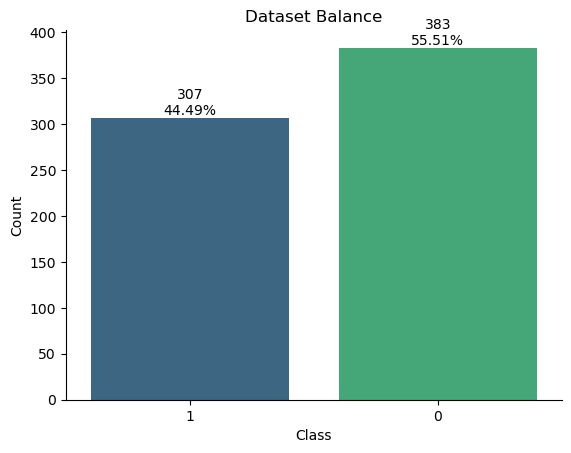

In [11]:
fig, ax = plt.subplots()

ax = sns.countplot(x=df['Class'], data=df, palette='viridis')
    
total = len(df)
    
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    text = f'{p.get_height():.0f}\n{percentage}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, text, ha='center', va='bottom')
        
ax.set_title(f'Dataset Balance')
ax.set_ylabel('Count')

sns.despine()
plt.show()

In [12]:
def plot_distribution_categorical(df):   
    categorical_features = df.select_dtypes(include=np.object_).columns
    categorical_features = categorical_features.drop('Class')
    
    fig, axs = plt.subplots((len(categorical_features) + 1) // 2, 2, figsize=(20, 20), constrained_layout=True)

    axs = axs.flatten()

    for i, col in enumerate(categorical_features):
        sns.countplot(y=col, data=df, ax=axs[i], order=df[col].value_counts().index, palette='viridis')
        axs[i].set_title(f'Distribution of {col}')
        axs[i].set_xlabel(col.capitalize())
        axs[i].set_ylabel('Count')

    # removing uneccessary (sub)plots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()

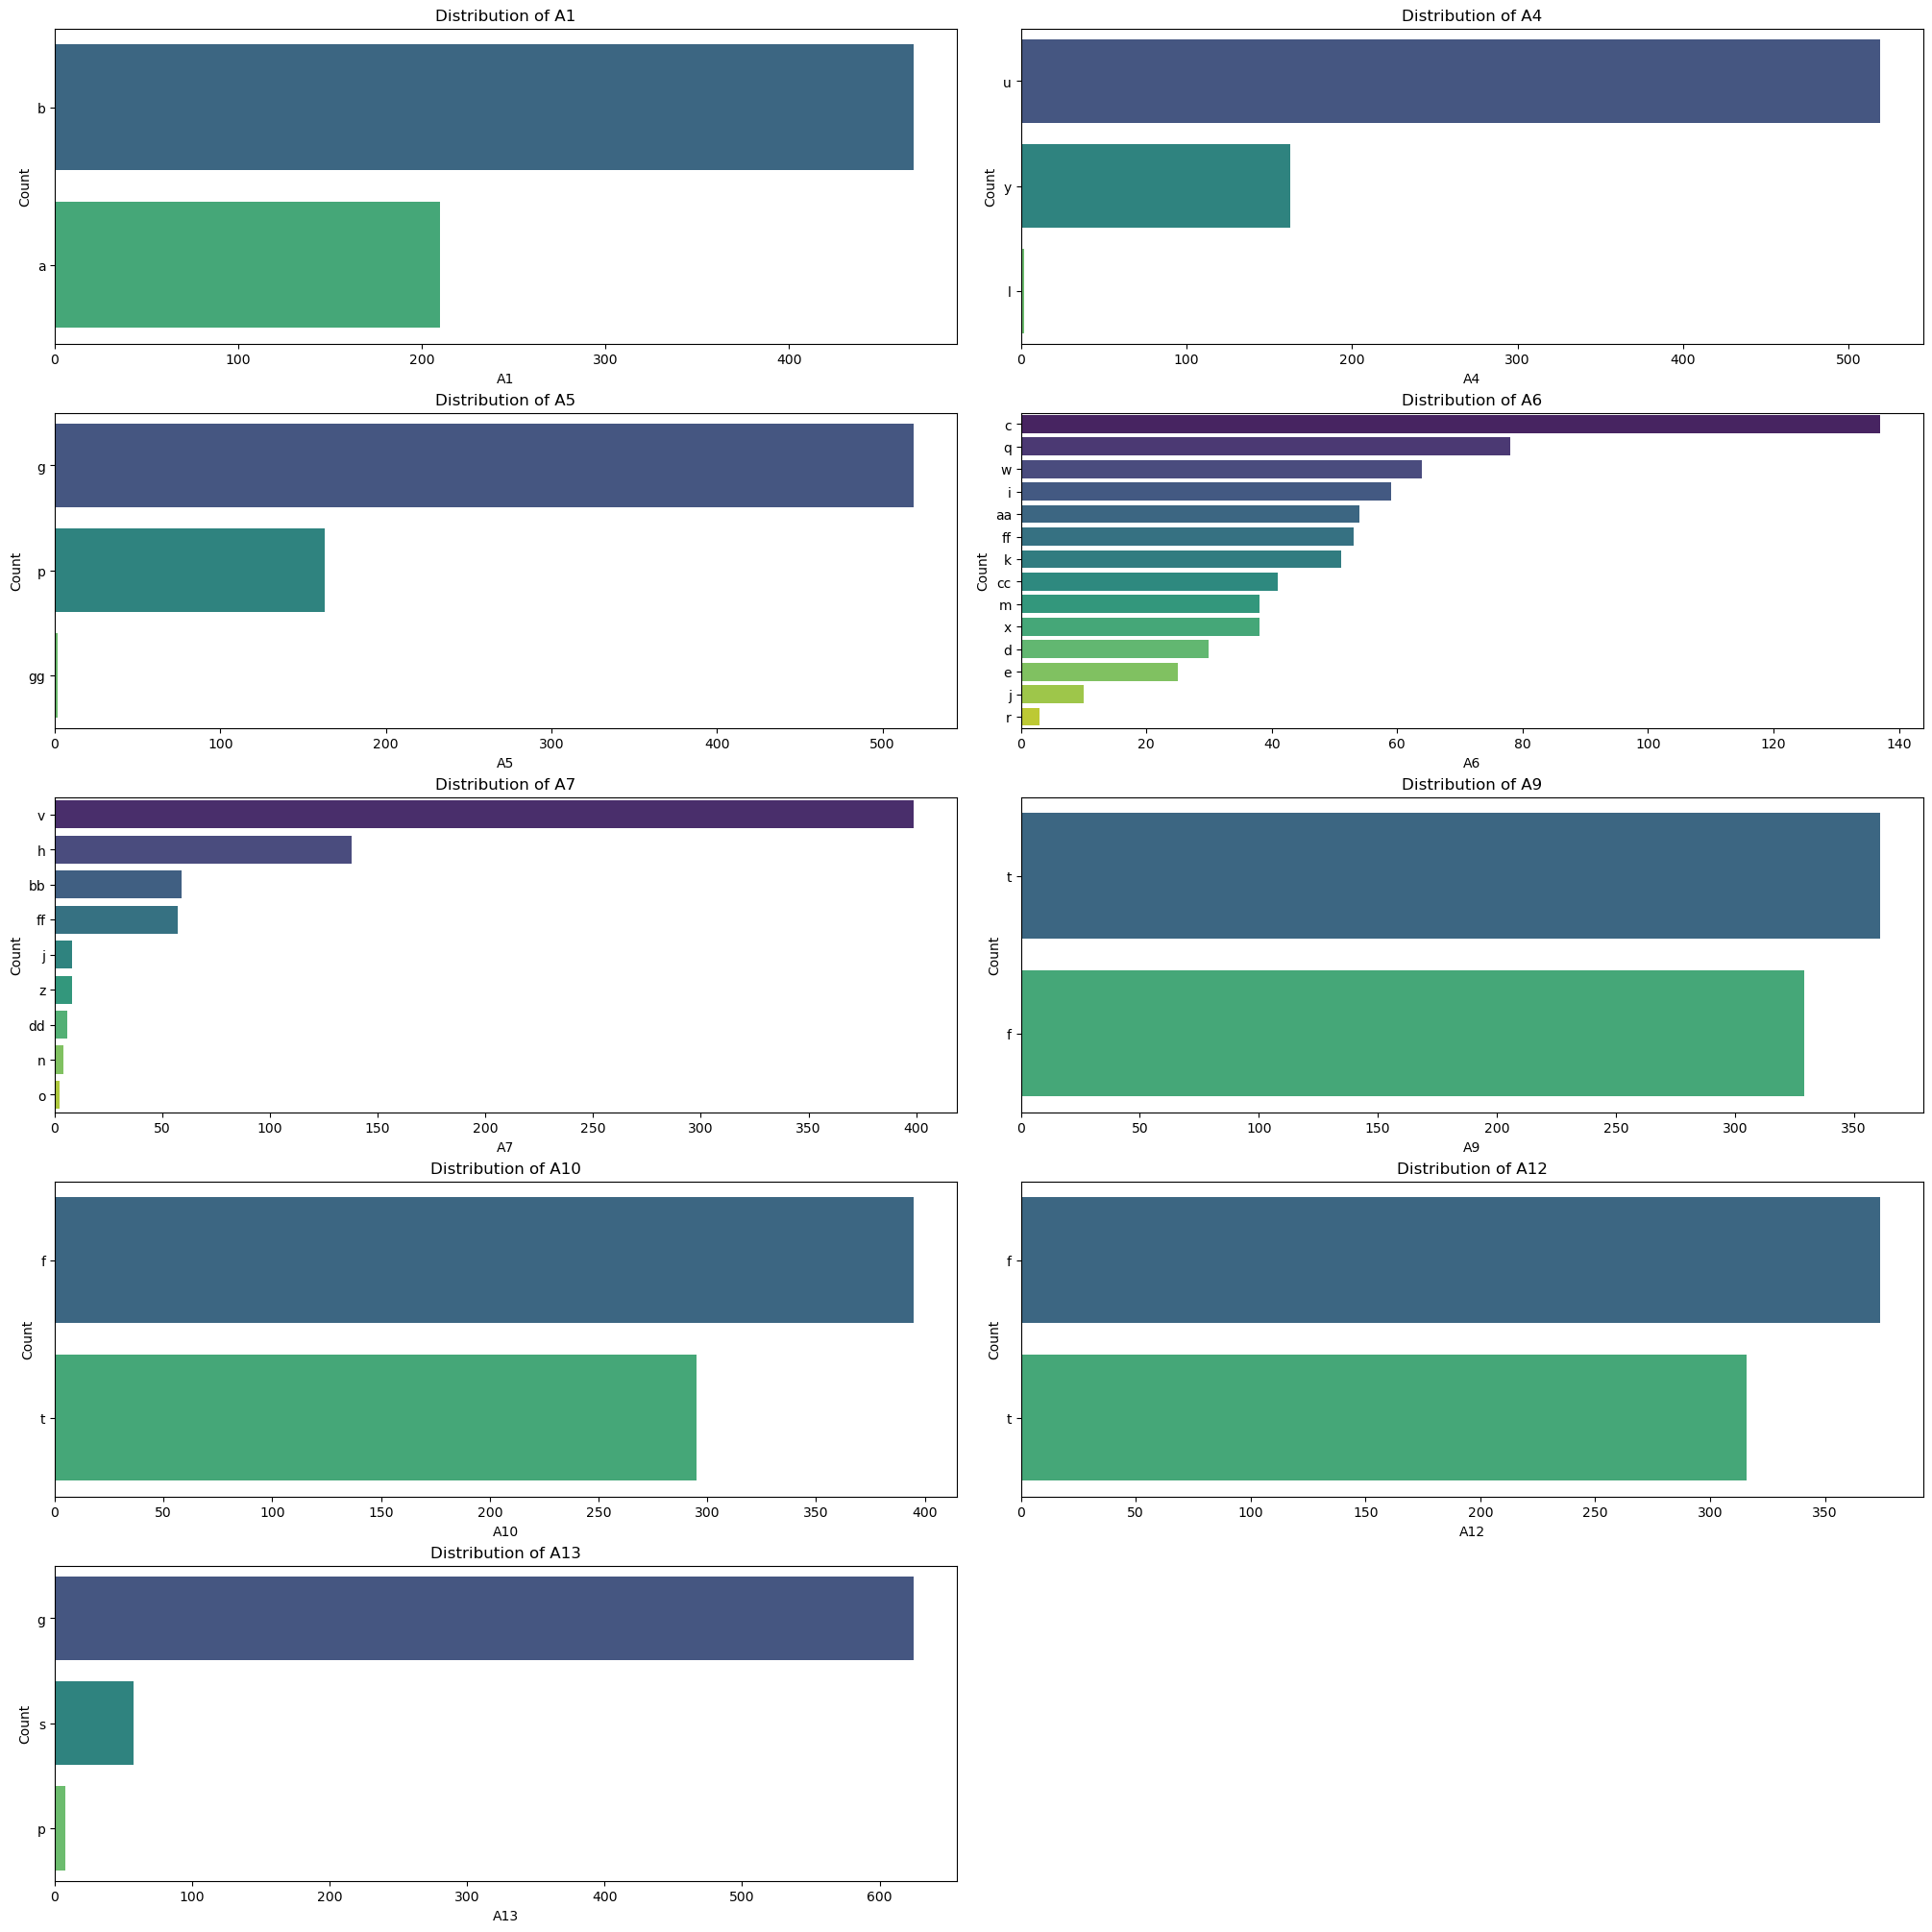

In [13]:
plot_distribution_categorical(df)

In [14]:
def plot_distribution_categorical_percentages(df):    
    categorical_features = df.select_dtypes(include=np.object_).columns
    categorical_features = categorical_features.drop('Class')
    
    fig, axs = plt.subplots(len(categorical_features), 1, figsize=(15, len(categorical_features) * 5), constrained_layout=True)

    for i, col in enumerate(categorical_features):

        ax = sns.countplot(x=col, hue='Class', data=df, ax=axs[i], order=df[col].value_counts().index, palette='viridis')

        total = len(df)

        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.2f}%'
            text = f'{p.get_height():.0f}\n{percentage}'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.text(x, y, text, ha='center', va='bottom')

        axs[i].set_title(f'Distribution of {col}')
        axs[i].set_xlabel(col.capitalize())
        axs[i].set_ylabel('Count')

    # removing uneccessary (sub)plots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
        
    sns.despine()
    plt.show()

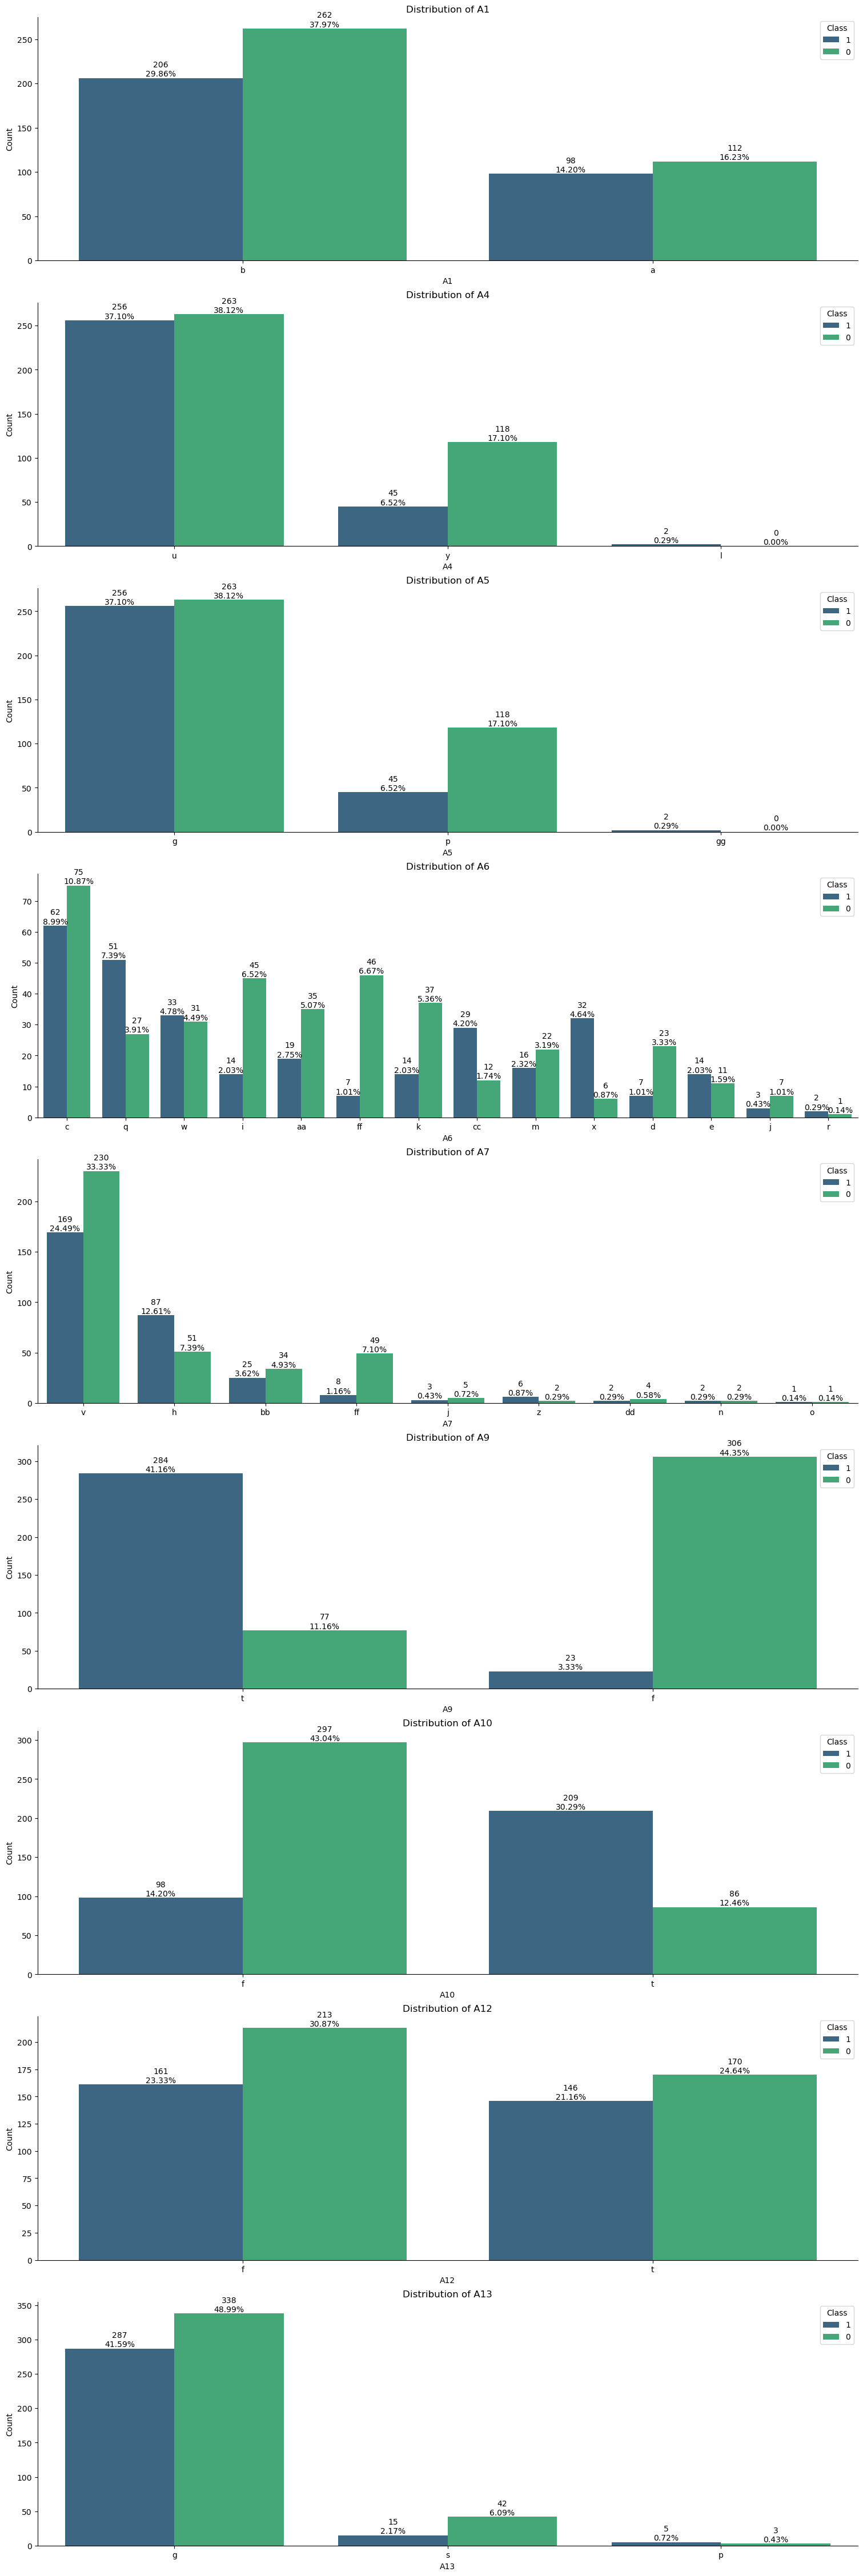

In [15]:
plot_distribution_categorical_percentages(df)

In [16]:
def plot_distribution_numerical(df):
    numerical_features = df.select_dtypes(include=np.number).columns
    num_features = len(numerical_features)
    num_cols = 2
    num_rows = (num_features + num_cols - 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20), constrained_layout=True)
    axs = axs.flatten()

    for i, col in enumerate(numerical_features):

        sns.histplot(x=col, data=df, ax=axs[i], kde=True, bins=20, color='blue', stat='density')
        
        mean, std = df[col].mean(), df[col].std()
        x = np.linspace(df[col].min(), df[col].max(), 100)
        p = norm.pdf(x, mean, std)
        axs[i].plot(x, p, 'k', linewidth=2, label='Normal dist.', color='red')

        axs[i].set_title(f'Distribution of {col}\nSkew: {df[col].skew():.4f}')
        axs[i].set_xlabel(col.capitalize())
        axs[i].set_ylabel('Density')
        axs[i].legend()

    # Remove unnecessary subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
        
    plt.show()

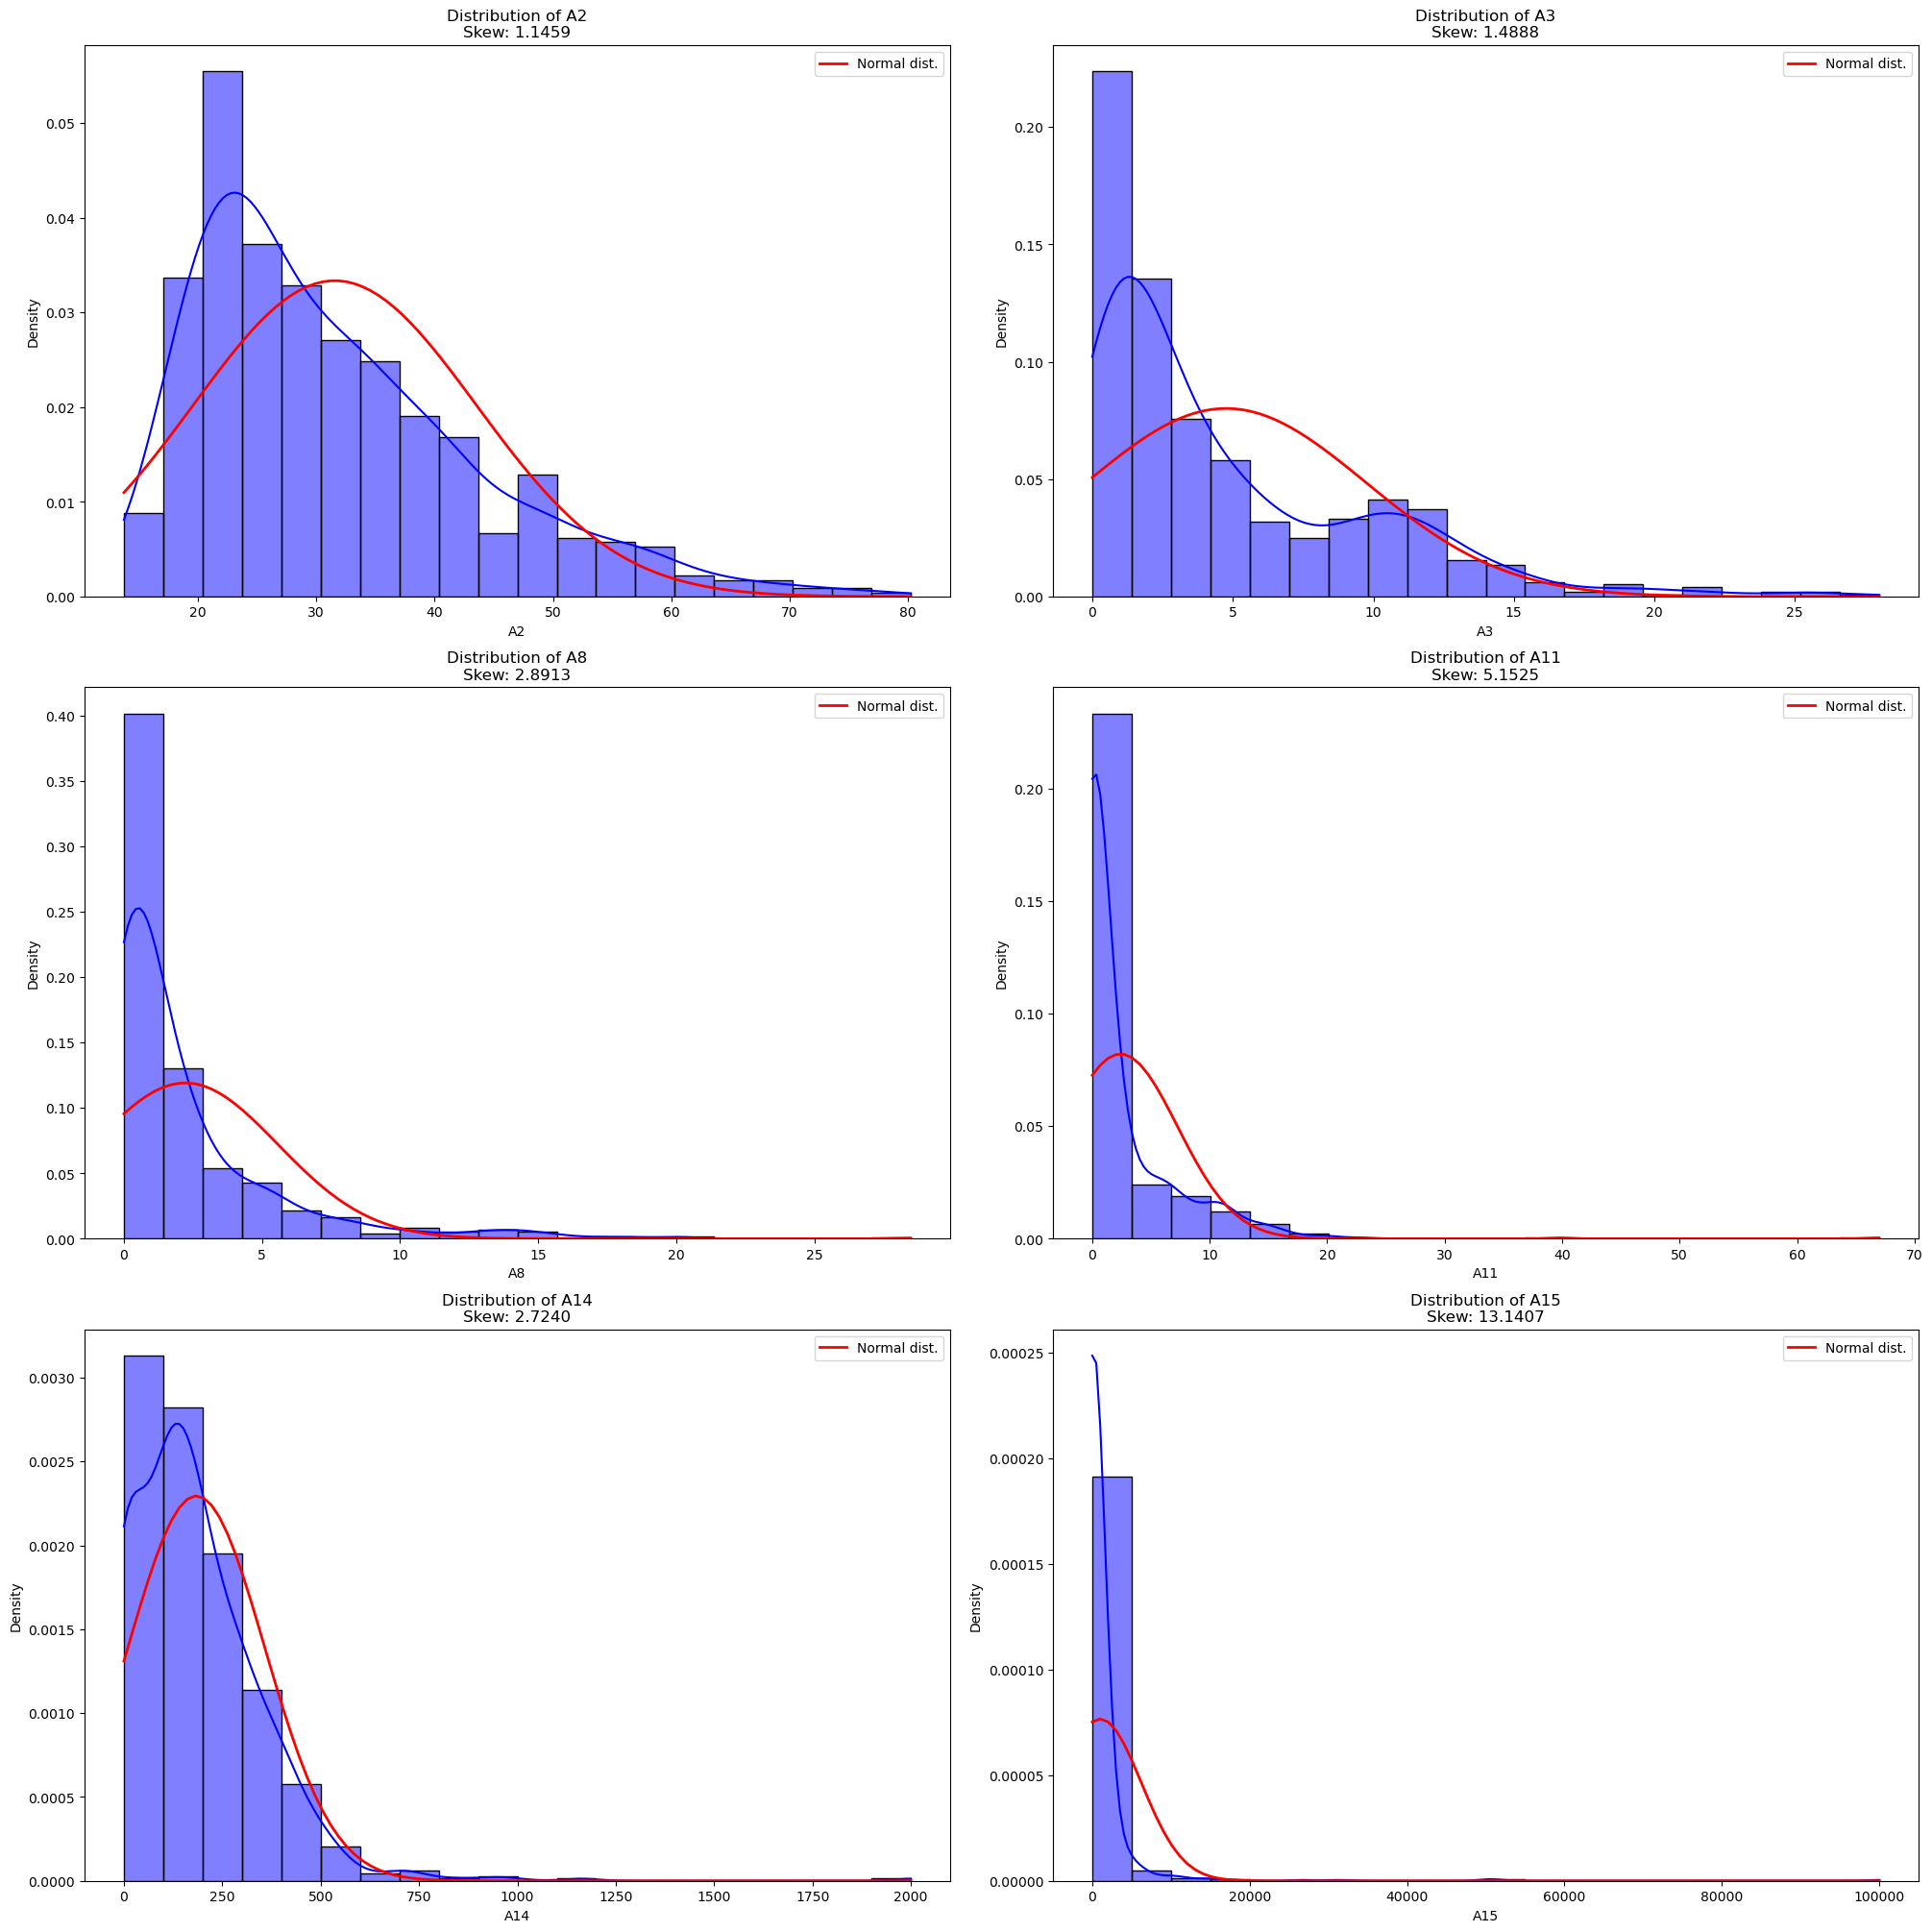

In [17]:
plot_distribution_numerical(df)

In [18]:
def plot_outliers(df):
    numerical_features = df.select_dtypes(include=np.number).columns
    num_features = len(numerical_features)
    num_cols = 2
    num_rows = (num_features + num_cols - 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 20), constrained_layout=True)
    axs = axs.flatten()
    
    for i, col in enumerate(numerical_features):
        sns.boxplot(y=col, x='Class', data=df, ax=axs[i], palette='viridis')
        ax=axs[i].set_title(col.capitalize())

    # removing uneccessary (sub)plots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])  
        
    plt.show()

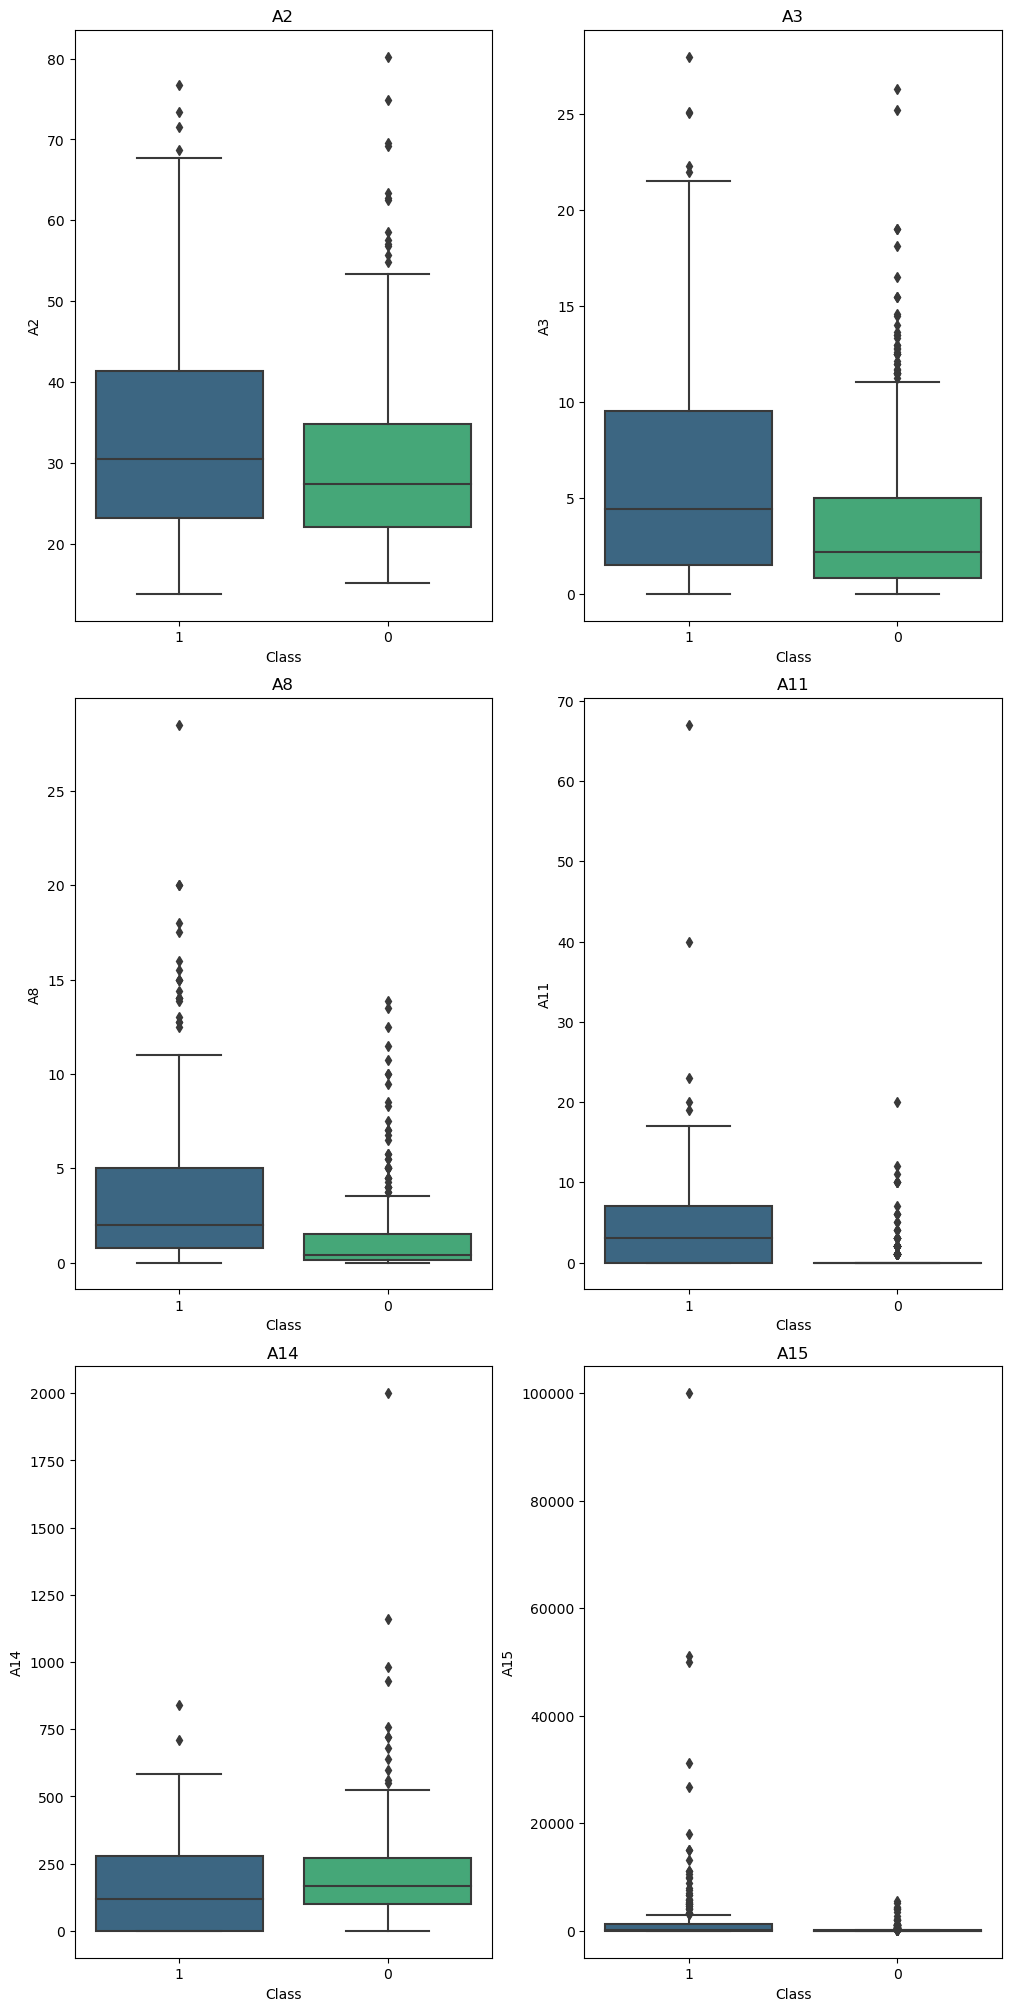

In [19]:
plot_outliers(df)

In [20]:
def outliers_iqr(df):
    numerical_features = df.select_dtypes(include=np.number).columns
    outliers = []

    for col in numerical_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers.extend(outliers_col)
        
    outliers = list(set(outliers))
    
    return outliers

In [21]:
len(outliers_iqr(df))

216

In [22]:
def outliers_zscore(df, threshold=3):
    numerical_features = df.select_dtypes(include=np.number).columns
    outliers = []

    for col in numerical_features:
        z_scores = zscore(df[col], nan_policy='omit')
        abs_z_scores = np.abs(z_scores)
        
        outliers_col = df[col][abs_z_scores > threshold].index
        outliers.extend(outliers_col)
        
    outliers = list(set(outliers))

    return outliers

In [23]:
len(outliers_zscore(df))

52

# Baseline

In [24]:
# df_baseline = df.copy(deep=True)
# df_baseline = df_baseline.dropna()
# categorical_features = df_baseline.select_dtypes(include='object').columns
# categorical_features = categorical_features.drop('Class')
# df_baseline = pd.get_dummies(df_baseline, columns=categorical_features)

# X_baseline = df_baseline.drop('Class', axis=1)
# y_baseline = df_baseline['Class'].astype('float').astype('Int64')

# scaler = StandardScaler()
# X_baseline = scaler.fit_transform(X_baseline)

# X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=42)

# decision_tree = DecisionTreeClassifier(random_state=42)
# random_forest = RandomForestClassifier(random_state=42)
# svm = SVC(probability=True, random_state=42)
# xgboost = XGBClassifier()
# logistic_regression = LogisticRegression()
# knn = KNeighborsClassifier()

# models = {
#     'Decision Tree': decision_tree,
#     'Random Forest': random_forest,
#     'SVM': svm,
#     'XGBOOST': xgboost,
#     'Logistic Regression': logistic_regression,
#     'KNN': knn
# }

# cv_results = {}
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# for name, model in models.items():
#     scores = cross_val_score(model, X_train_baseline, y_train_baseline, cv=kf, scoring='accuracy')
#     cv_results[name] = scores
#     print(f'{name}: Mean Accuracy = {scores.mean():.3f}, Std = {scores.std():.3f}')

# cv_results_df = pd.DataFrame(cv_results)
# print(cv_results_df)

# test_results = {}
# roc_curves = {}

# plt.figure(figsize=(5, 4))

# for name, model in models.items():
#     model.fit(X_train_baseline, y_train_baseline)
#     y_pred = model.predict(X_test_baseline)
#     accuracy = accuracy_score(y_test_baseline, y_pred)
#     test_results[name] = accuracy
#     print(f'{name} Test Accuracy: {accuracy:.3f}')
    
#     if hasattr(model, "predict_proba"):
#         y_prob = model.predict_proba(X_test_baseline)[:, 1]
#     else:  # For SVM without probability=True
#         y_prob = model.decision_function(X_test_baseline)
        
#     fpr, tpr, _ = roc_curve(y_test_baseline, y_prob)
#     roc_auc = auc(fpr, tpr)
#     roc_curves[name] = (fpr, tpr, roc_auc)
    
#     plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
# # Plot all ROC Curves on one graph
# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves')
# plt.legend(loc='lower right')
# plt.show()

# fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
# for ax, (name, model) in zip(axes, models.items()):
#     model.fit(X_train_baseline, y_train_baseline)
#     y_pred = model.predict(X_test_baseline)
#     cm = confusion_matrix(y_test_baseline, y_pred)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
#     disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
#     ax.set_title(name)

# plt.tight_layout()
# plt.show()

# test_results_baseline_df = pd.DataFrame(test_results, index=['Test Accuracy'])
# print(test_results_baseline_df)

Since A3, A8, A11, A14, A15 have a lot of outliers and all of them are positive, skewed as well

In [25]:
log_transform_features = ['A3', 'A8', 'A11', 'A14', 'A15']
for col in log_transform_features:
    minimum = df[col].min()
    df[col] = df[col] - minimum + 1
    df[col] = np.log(df[col])

df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000000,u,g,w,v,0.810930,t,t,0.693147,f,g,5.313206,0.000000,1
1,a,58.67,1.697449,u,g,q,h,1.396245,t,t,1.945910,f,g,3.784190,6.329721,1
2,a,24.50,0.405465,u,g,q,h,0.916291,t,f,0.000000,f,g,5.638355,6.715383,1
3,b,27.83,0.932164,u,g,w,v,1.558145,t,t,1.791759,t,g,4.615121,1.386294,1
4,b,20.17,1.890850,u,g,w,v,0.996949,t,f,0.000000,f,s,4.795791,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,2.405593,y,p,e,h,0.810930,f,f,0.000000,f,g,5.564520,0.000000,0
686,a,22.67,0.559616,u,g,c,v,1.098612,f,t,1.098612,t,g,5.303305,5.978886,0
687,a,25.25,2.674149,y,p,ff,ff,1.098612,f,t,0.693147,t,g,5.303305,0.693147,0
688,b,17.92,0.186480,u,g,aa,v,0.039221,f,f,0.000000,f,g,5.638355,6.621406,0


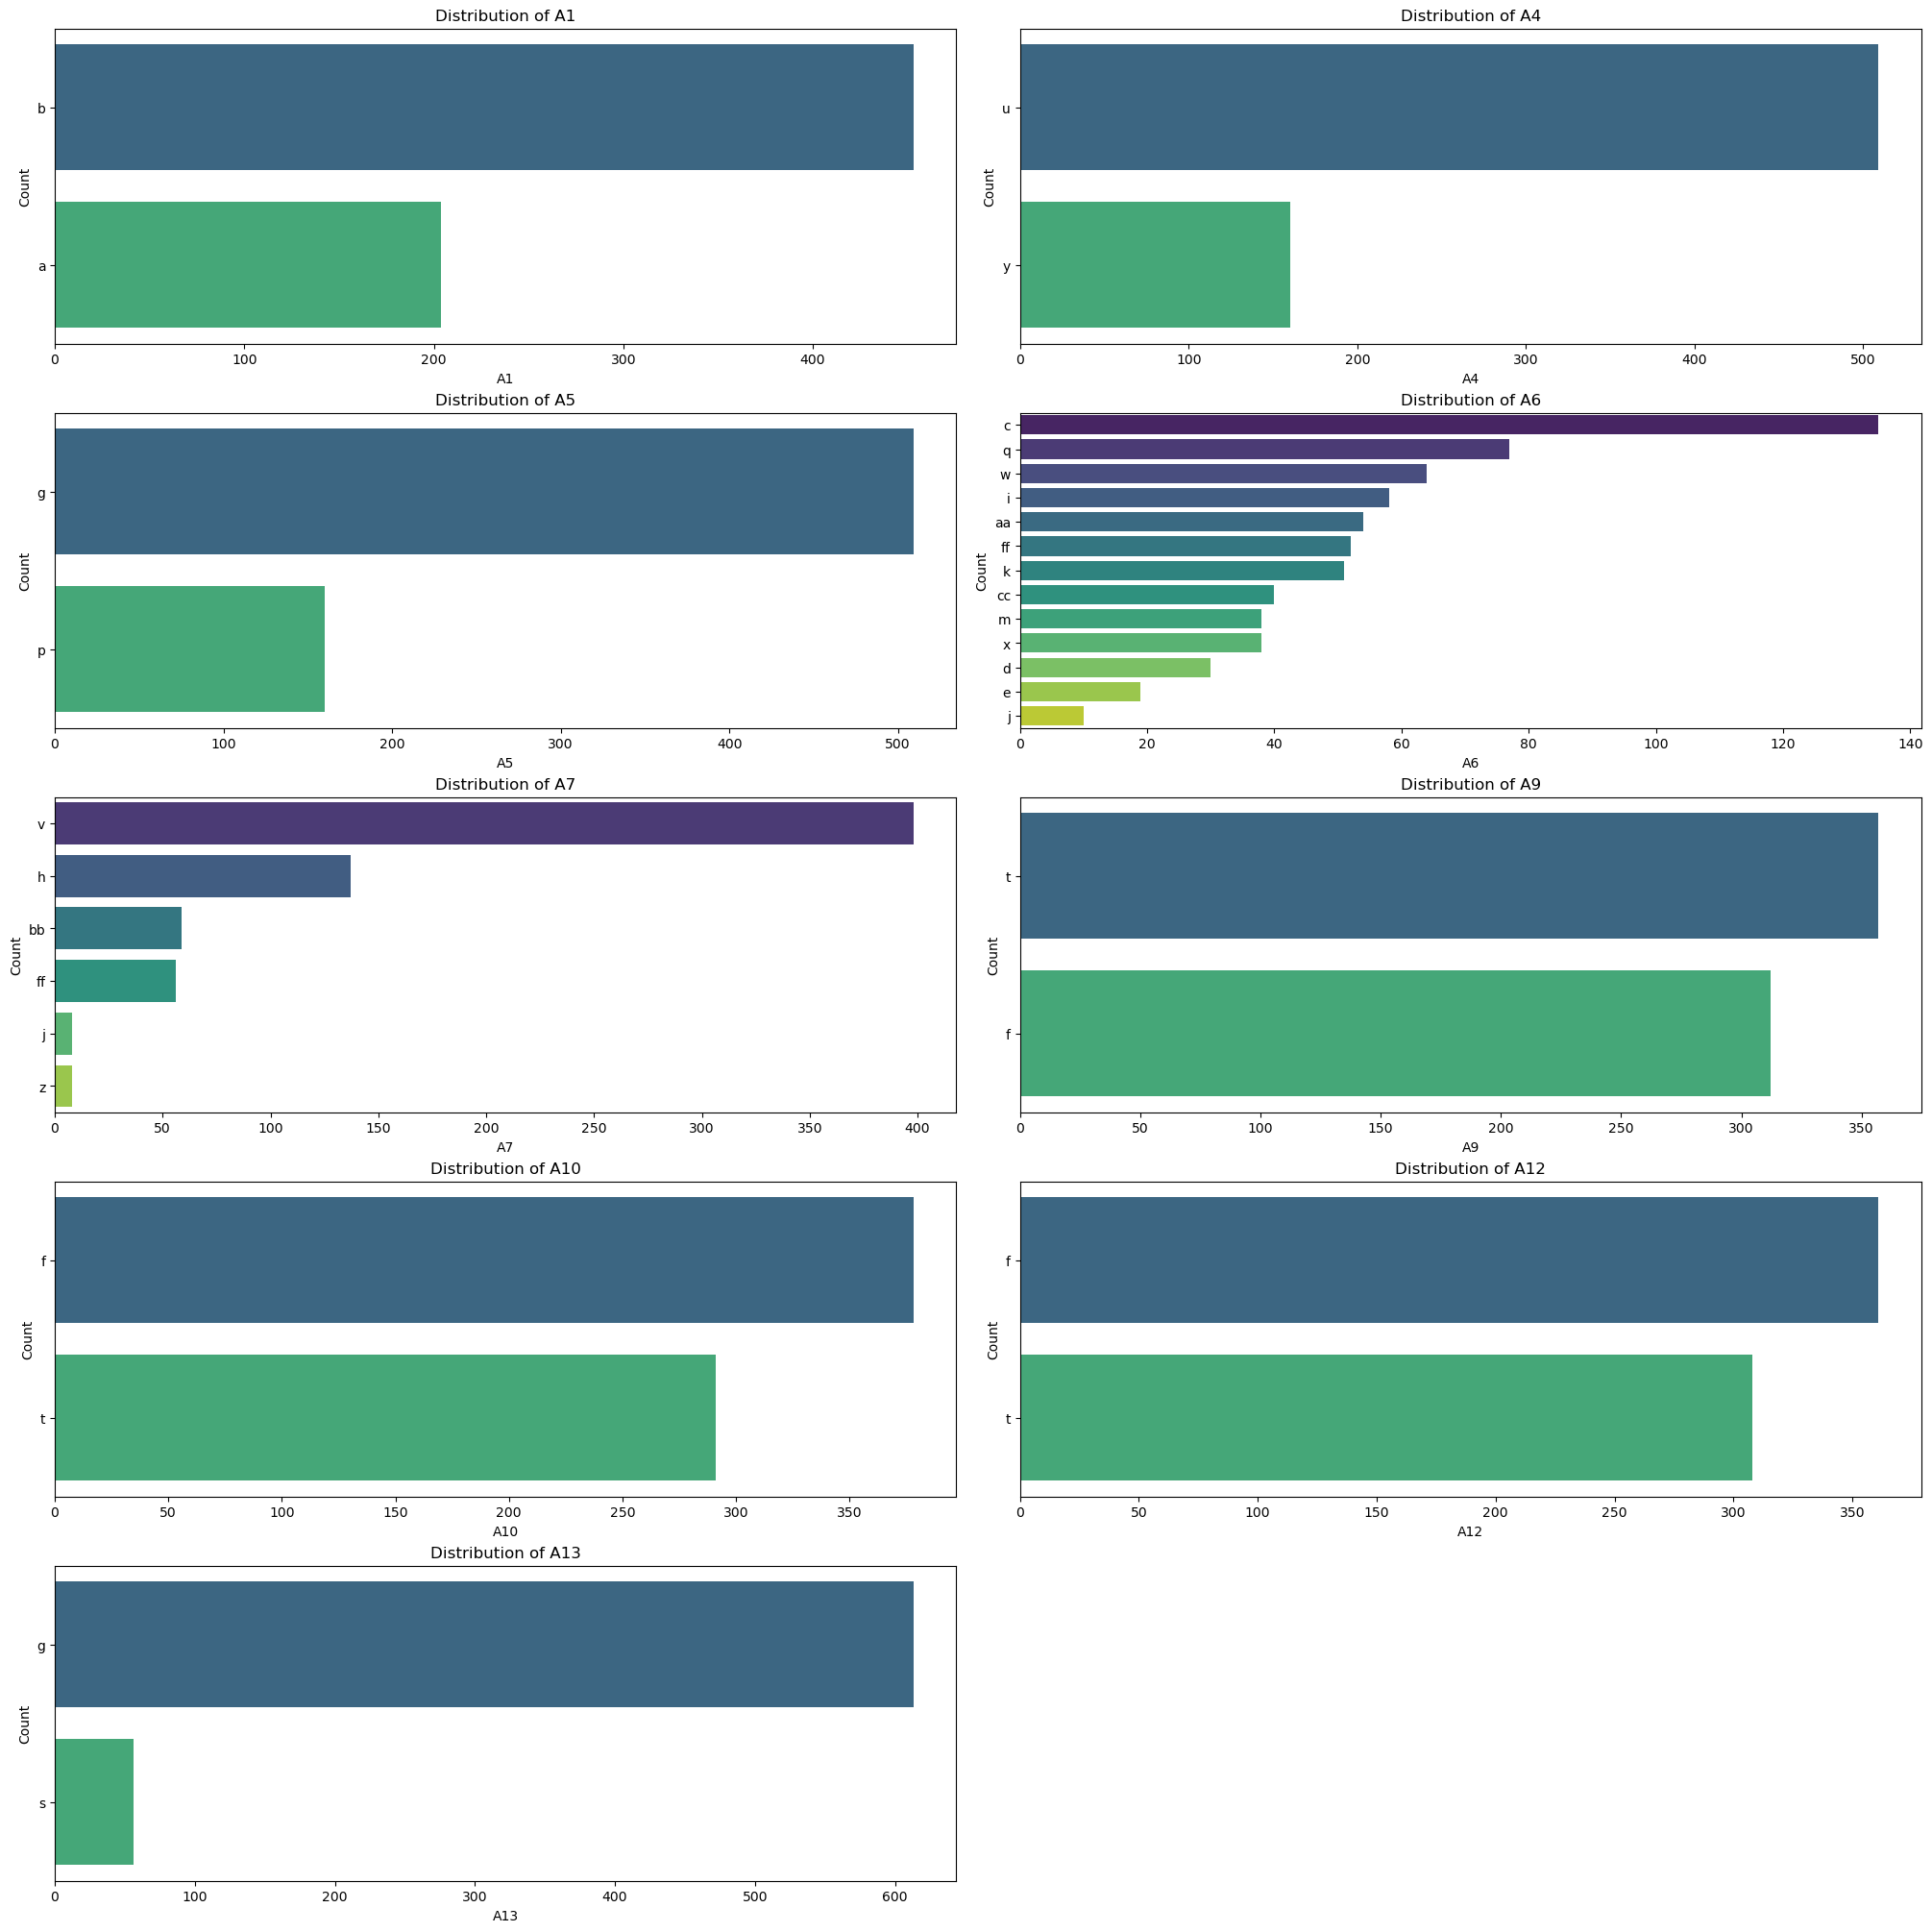

In [26]:
df_drop = df.copy(deep=True)

df_drop = df_drop[df_drop['A4'] != 'l']
df_drop = df_drop[df_drop['A5'] != 'gg']
df_drop = df_drop[df_drop['A6'] != 'r']
df_drop = df_drop[~df_drop['A7'].isin(['o', 'n', 'dd'])]
df_drop = df_drop[df_drop['A13'] != 'p']
plot_distribution_categorical(df_drop)

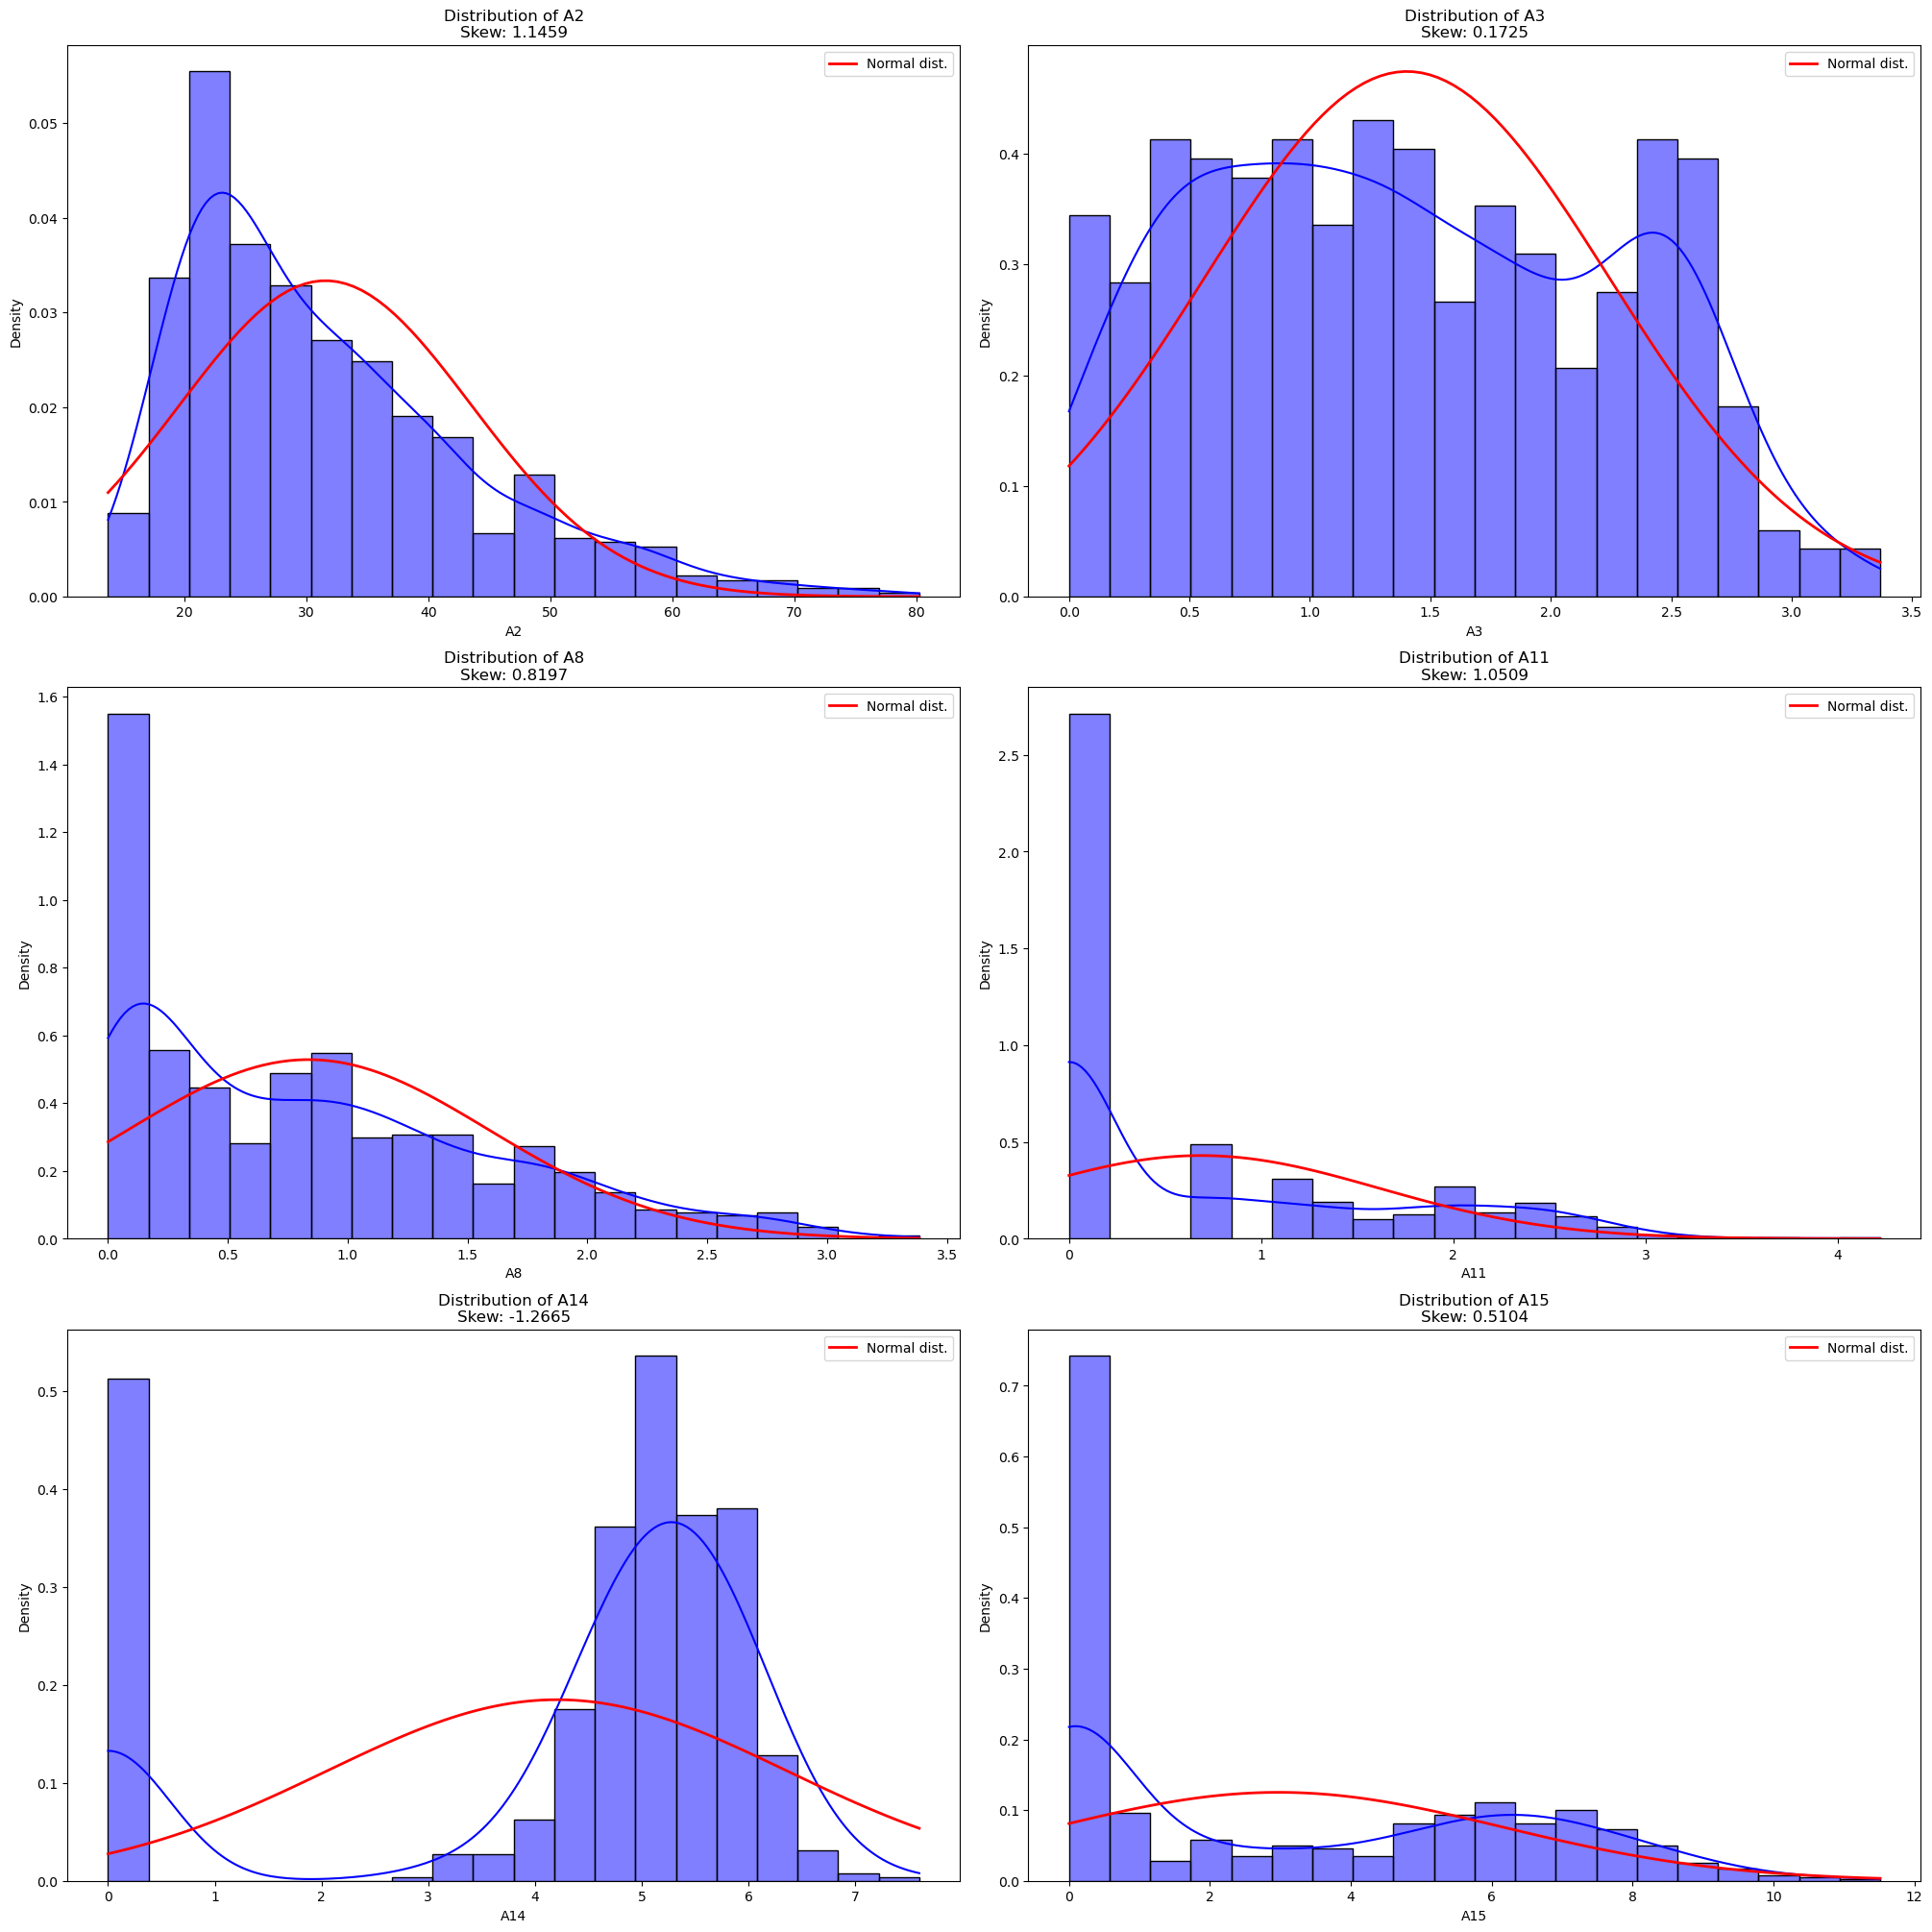

In [27]:
plot_distribution_numerical(df)

# Correlation Matrix

No highly correlated features, not removing any of them

<Axes: >

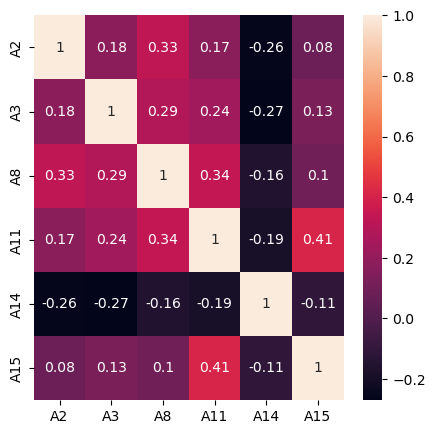

In [28]:
numeric_features_corr = df.select_dtypes(include='number').columns
corr = df.corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data=corr, annot=True, ax=ax)

In [29]:
df['Class'] = df['Class'].astype(int)
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_drop['Class'] = df_drop['Class'].astype(int)
X_drop = df_drop.drop(columns=['Class'])
y_drop = df_drop['Class']

X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_drop, y_drop, test_size=0.2, random_state=42)


# Imputation

In [30]:
numerical_features = df.select_dtypes(include=np.number).columns
numerical_features = numerical_features.drop('Class')
categorical_features = df.select_dtypes(include=np.object_).columns


cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(X_train[categorical_features]), columns=categorical_features)
X_test_cat_imputed = pd.DataFrame(cat_imputer.transform(X_test[categorical_features]), columns=categorical_features)

num_imputer = KNNImputer(n_neighbors=5)
X_train_num_imputed = pd.DataFrame(num_imputer.fit_transform(X_train[numerical_features]), columns=numerical_features)
X_test_num_imputed = pd.DataFrame(num_imputer.transform(X_test[numerical_features]), columns=numerical_features)

X_train_imputed = pd.concat([X_train_cat_imputed, X_train_num_imputed], axis=1)
X_test_imputed = pd.concat([X_test_cat_imputed, X_test_num_imputed], axis=1)

In [31]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      657 non-null    object 
 1   A2      657 non-null    float64
 2   A3      669 non-null    float64
 3   A4      669 non-null    object 
 4   A5      669 non-null    object 
 5   A6      666 non-null    object 
 6   A7      666 non-null    object 
 7   A8      669 non-null    float64
 8   A9      669 non-null    object 
 9   A10     669 non-null    object 
 10  A11     669 non-null    float64
 11  A12     669 non-null    object 
 12  A13     669 non-null    object 
 13  A14     662 non-null    float64
 14  A15     669 non-null    float64
 15  Class   669 non-null    int32  
dtypes: float64(6), int32(1), object(9)
memory usage: 102.4+ KB


In [32]:
numerical_features = df_drop.select_dtypes(include=np.number).columns
numerical_features = numerical_features.drop('Class')
categorical_features = df_drop.select_dtypes(include=np.object_).columns


cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat_imputed_drop = pd.DataFrame(cat_imputer.fit_transform(X_train_drop[categorical_features]), columns=categorical_features)
X_test_cat_imputed_drop = pd.DataFrame(cat_imputer.transform(X_test_drop[categorical_features]), columns=categorical_features)

num_imputer = KNNImputer(n_neighbors=5)
X_train_num_imputed_drop = pd.DataFrame(num_imputer.fit_transform(X_train_drop[numerical_features]), columns=numerical_features)
X_test_num_imputed_drop = pd.DataFrame(num_imputer.transform(X_test_drop[numerical_features]), columns=numerical_features)

X_train_imputed_drop = pd.concat([X_train_cat_imputed_drop, X_train_num_imputed_drop], axis=1)
X_test_imputed_drop = pd.concat([X_test_cat_imputed_drop, X_test_num_imputed_drop], axis=1)

# Encoding

Since we don't know if the categories are ordinal or nominal, we will assume they are nominal (mainly for A6 and A7)

In [33]:
one_hot_features = ['A1', 'A4', 'A5', 'A9', 'A10', 'A12', 'A13']
frequency_encode_features = ['A6', 'A7']

X_train_encoded_drop = pd.get_dummies(X_train_imputed_drop, columns=one_hot_features)
X_test_encoded_drop = pd.get_dummies(X_test_imputed_drop, columns=one_hot_features)

X_test_encoded_drop = X_test_encoded_drop.reindex(columns=X_train_encoded_drop.columns, fill_value=0)

for col in frequency_encode_features:
    freq = X_train_encoded_drop[col].value_counts() / len(X_train_encoded_drop)
    X_train_encoded_drop[col] = X_train_encoded_drop[col].map(freq)
    X_test_encoded_drop[col] = X_test_encoded_drop[col].map(freq)

In [34]:
X_train_encoded = pd.get_dummies(X_train_imputed, columns=one_hot_features)
X_test_encoded = pd.get_dummies(X_test_imputed, columns=one_hot_features)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

for col in frequency_encode_features:
    freq = X_train_encoded[col].value_counts() / len(X_train_encoded)
    X_train_encoded[col] = X_train_encoded[col].map(freq)
    X_test_encoded[col] = X_test_encoded[col].map(freq)

In [35]:
X_train_encoded_no_discretization = X_train_encoded.copy()
X_test_encoded_no_discretization = X_test_encoded.copy()

X_train_encoded_no_discretization_minmax = X_train_encoded.copy()
X_test_encoded_no_discretization_minmax = X_test_encoded.copy()

X_train_encoded_no_discretization_drop = X_train_encoded_drop.copy()
X_test_encoded_no_discretization_drop = X_test_encoded_drop.copy()
X_train_encoded_no_discretization_drop_minmax = X_train_encoded_no_discretization_drop.copy()
X_test_encoded_no_discretization_drop_minmax = X_test_encoded_no_discretization_drop.copy()

# Discretization

Also tested without discretization, no difference in performance

In [36]:
kbins_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
X_train_encoded['A2'] = kbins_discretizer.fit_transform(X_train_encoded[['A2']])
X_test_encoded['A2'] = kbins_discretizer.transform(X_test_encoded[['A2']])

X_train_encoded_minmax = X_train_encoded.copy()
X_test_encoded_minmax = X_test_encoded.copy()

X_train_encoded_drop['A2'] = kbins_discretizer.fit_transform(X_train_encoded_drop[['A2']])
X_test_encoded_drop['A2'] = kbins_discretizer.transform(X_test_encoded_drop[['A2']])

X_train_encoded_drop_minmax = X_train_encoded_drop.copy()
X_test_encoded_drop_minmax = X_test_encoded_drop.copy()

# Scaling

In [37]:
scaling_features = ['A2', 'A3', 'A6', 'A7', 'A8', 'A11', 'A14', 'A15']

scaler = StandardScaler()

X_train_encoded_no_discretization[scaling_features] = scaler.fit_transform(X_train_encoded_no_discretization[scaling_features])
X_test_encoded_no_discretization[scaling_features] = scaler.transform(X_test_encoded_no_discretization[scaling_features])

scaler = StandardScaler()

X_train_encoded_no_discretization_drop[scaling_features] = scaler.fit_transform(X_train_encoded_no_discretization_drop[scaling_features])
X_test_encoded_no_discretization_drop[scaling_features] = scaler.transform(X_test_encoded_no_discretization_drop[scaling_features])

scaler = StandardScaler()

X_train_encoded[scaling_features] = scaler.fit_transform(X_train_encoded[scaling_features])
X_test_encoded[scaling_features] = scaler.transform(X_test_encoded[scaling_features])

scaler = StandardScaler()

X_train_encoded_drop[scaling_features] = scaler.fit_transform(X_train_encoded_drop[scaling_features])
X_test_encoded_drop[scaling_features] = scaler.transform(X_test_encoded_drop[scaling_features])

In [38]:
scaling_features = ['A2', 'A3', 'A6', 'A7', 'A8', 'A11', 'A14', 'A15']

scaler = MinMaxScaler()

X_train_encoded_minmax[scaling_features] = scaler.fit_transform(X_train_encoded_minmax[scaling_features])
X_test_encoded_minmax[scaling_features] = scaler.transform(X_test_encoded_minmax[scaling_features])

scaler = MinMaxScaler()

X_train_encoded_no_discretization_drop_minmax[scaling_features] = scaler.fit_transform(X_train_encoded_no_discretization_drop_minmax[scaling_features])
X_test_encoded_no_discretization_drop_minmax[scaling_features] = scaler.transform(X_test_encoded_no_discretization_drop_minmax[scaling_features])

scaler = MinMaxScaler()

X_train_encoded_drop_minmax[scaling_features] = scaler.fit_transform(X_train_encoded_drop_minmax[scaling_features])
X_test_encoded_drop_minmax[scaling_features] = scaler.transform(X_test_encoded_drop_minmax[scaling_features])

scaler = MinMaxScaler()

X_train_encoded_no_discretization_minmax[scaling_features] = scaler.fit_transform(X_train_encoded_no_discretization_minmax[scaling_features])
X_test_encoded_no_discretization_minmax[scaling_features] = scaler.transform(X_test_encoded_no_discretization_minmax[scaling_features])

In [39]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test, df_score, dataset_name):
    # So KNN stops complaining
    X_train_encoded = np.ascontiguousarray(X_train)
    X_test_encoded = np.ascontiguousarray(X_test)

    decision_tree = DecisionTreeClassifier(random_state=42)
    random_forest = RandomForestClassifier(random_state=42)
    svm = SVC(probability=True, random_state=42)
    xgboost = XGBClassifier()
    logistic_regression = LogisticRegression()
    knn = KNeighborsClassifier()

    models = {
        'Decision Tree': decision_tree,
        'Random Forest': random_forest,
        'SVM': svm,
        'XGBOOST': xgboost,
        'Logistic Regression': logistic_regression,
        'KNN': knn
    }

    cv_results = {}
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        scores = cross_val_score(model, X_train_encoded, y_train, cv=kf, scoring='accuracy')
        cv_results[name] = scores
        print(f'{name}: Mean Accuracy = {scores.mean():.3f}, Std = {scores.std():.3f}')

    cv_results_df = pd.DataFrame(cv_results)
    print(cv_results_df)

    test_results = {'Dataset': dataset_name}
    roc_curves = {}

    plt.figure(figsize=(10, 8))

    for name, model in models.items():
        model.fit(X_train_encoded, y_train)
        y_pred = model.predict(X_test_encoded)
        accuracy = accuracy_score(y_test, y_pred)
        test_results[name] = accuracy
        print(f'{name} Test Accuracy: {accuracy:.3f}')
        
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_encoded)[:, 1]
        else:  # For SVM without probability=True
            y_prob = model.decision_function(X_test_encoded)
            
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        roc_curves[name] = (fpr, tpr, roc_auc)
        
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for ax, (name, model) in zip(axes.flatten(), models.items()):
        model.fit(X_train_encoded, y_train)
        y_pred = model.predict(X_test_encoded)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
        ax.set_title(name)

    plt.tight_layout()
    plt.show()

    test_results_df = pd.DataFrame(test_results, index=[0])
    
    df_score = pd.concat([df_score, test_results_df], ignore_index=True)
    return df_score

In [40]:
df_score = pd.DataFrame()

Decision Tree: Mean Accuracy = 0.831, Std = 0.020
Random Forest: Mean Accuracy = 0.871, Std = 0.029
SVM: Mean Accuracy = 0.850, Std = 0.033
XGBOOST: Mean Accuracy = 0.862, Std = 0.043
Logistic Regression: Mean Accuracy = 0.868, Std = 0.047
KNN: Mean Accuracy = 0.826, Std = 0.052
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.855856       0.900901  0.882883  0.891892             0.891892   
1       0.819820       0.846847  0.810811  0.792793             0.810811   
2       0.818182       0.881818  0.845455  0.863636             0.881818   
3       0.854545       0.900000  0.890909  0.918182             0.936364   
4       0.809091       0.827273  0.818182  0.845455             0.818182   

        KNN  
0  0.873874  
1  0.810811  
2  0.809091  
3  0.890909  
4  0.745455  
Decision Tree Test Accuracy: 0.812
Random Forest Test Accuracy: 0.841
SVM Test Accuracy: 0.833
XGBOOST Test Accuracy: 0.826
Logistic Regression Test Accuracy: 0.870
KNN Test Accur

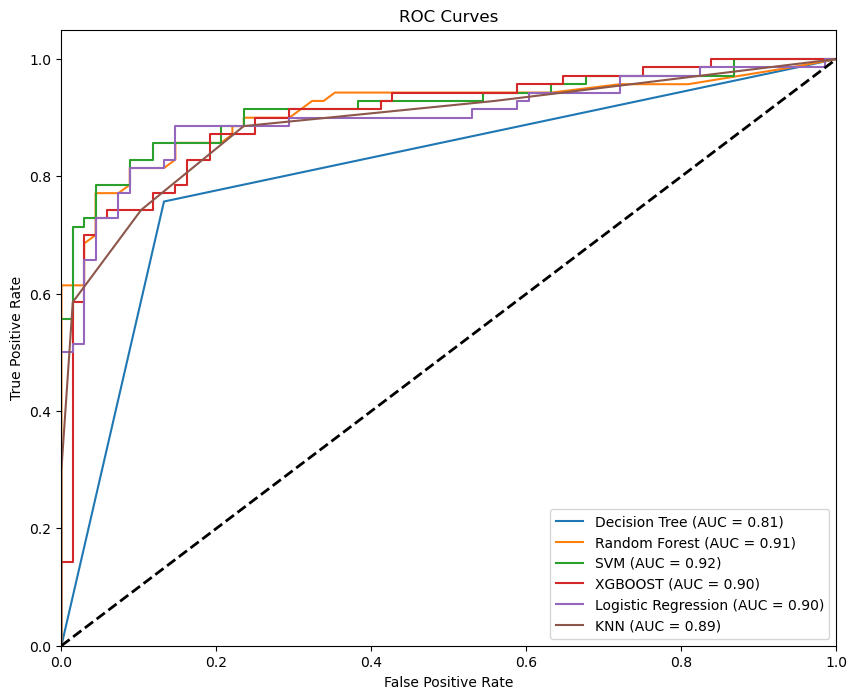

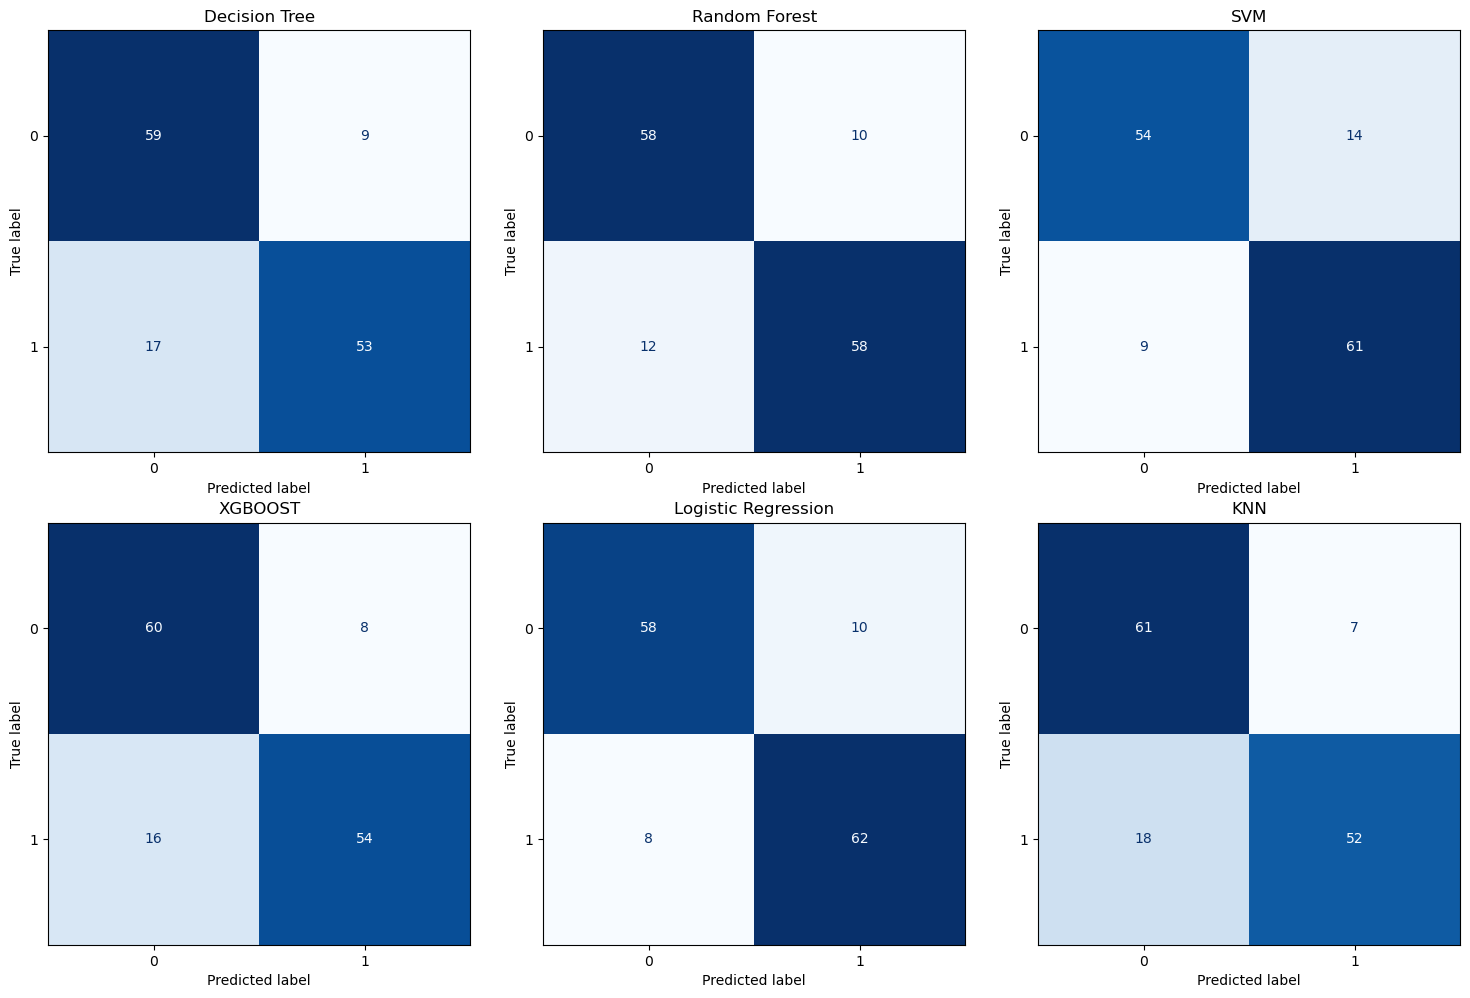

In [41]:
df_score = train_and_evaluate_models(
    X_train_encoded, X_test_encoded, y_train, y_test, df_score, 'Discretization, Standard Scaler'
)

Decision Tree: Mean Accuracy = 0.835, Std = 0.029
Random Forest: Mean Accuracy = 0.866, Std = 0.023
SVM: Mean Accuracy = 0.851, Std = 0.038
XGBOOST: Mean Accuracy = 0.866, Std = 0.042
Logistic Regression: Mean Accuracy = 0.864, Std = 0.046
KNN: Mean Accuracy = 0.810, Std = 0.043
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.864865       0.882883  0.882883  0.882883             0.882883   
1       0.801802       0.855856  0.792793  0.801802             0.810811   
2       0.845455       0.854545  0.845455  0.872727             0.872727   
3       0.863636       0.900000  0.900000  0.927273             0.936364   
4       0.800000       0.836364  0.836364  0.845455             0.818182   

        KNN  
0  0.846847  
1  0.837838  
2  0.809091  
3  0.827273  
4  0.727273  
Decision Tree Test Accuracy: 0.790
Random Forest Test Accuracy: 0.862
SVM Test Accuracy: 0.841
XGBOOST Test Accuracy: 0.812
Logistic Regression Test Accuracy: 0.870
KNN Test Accur

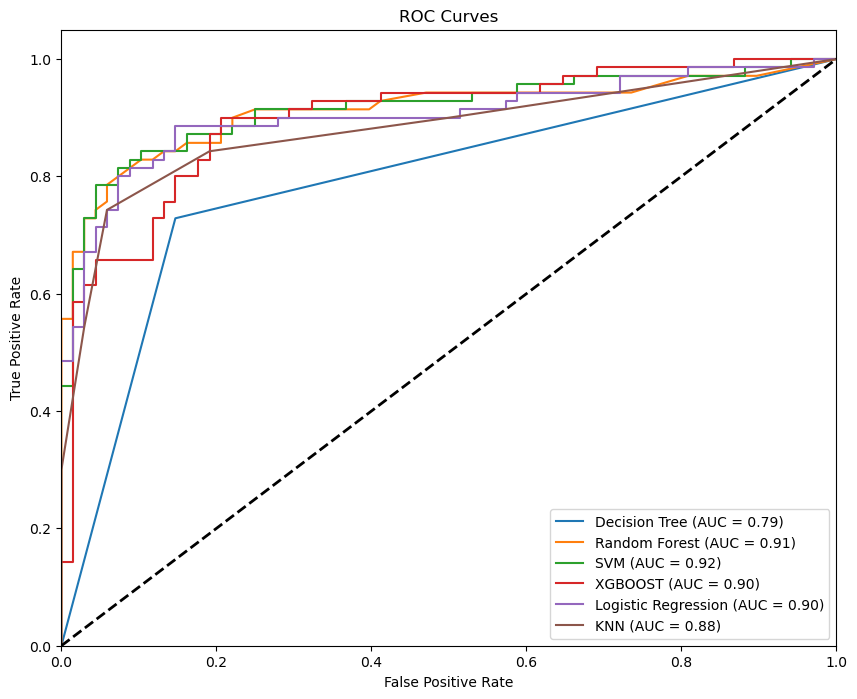

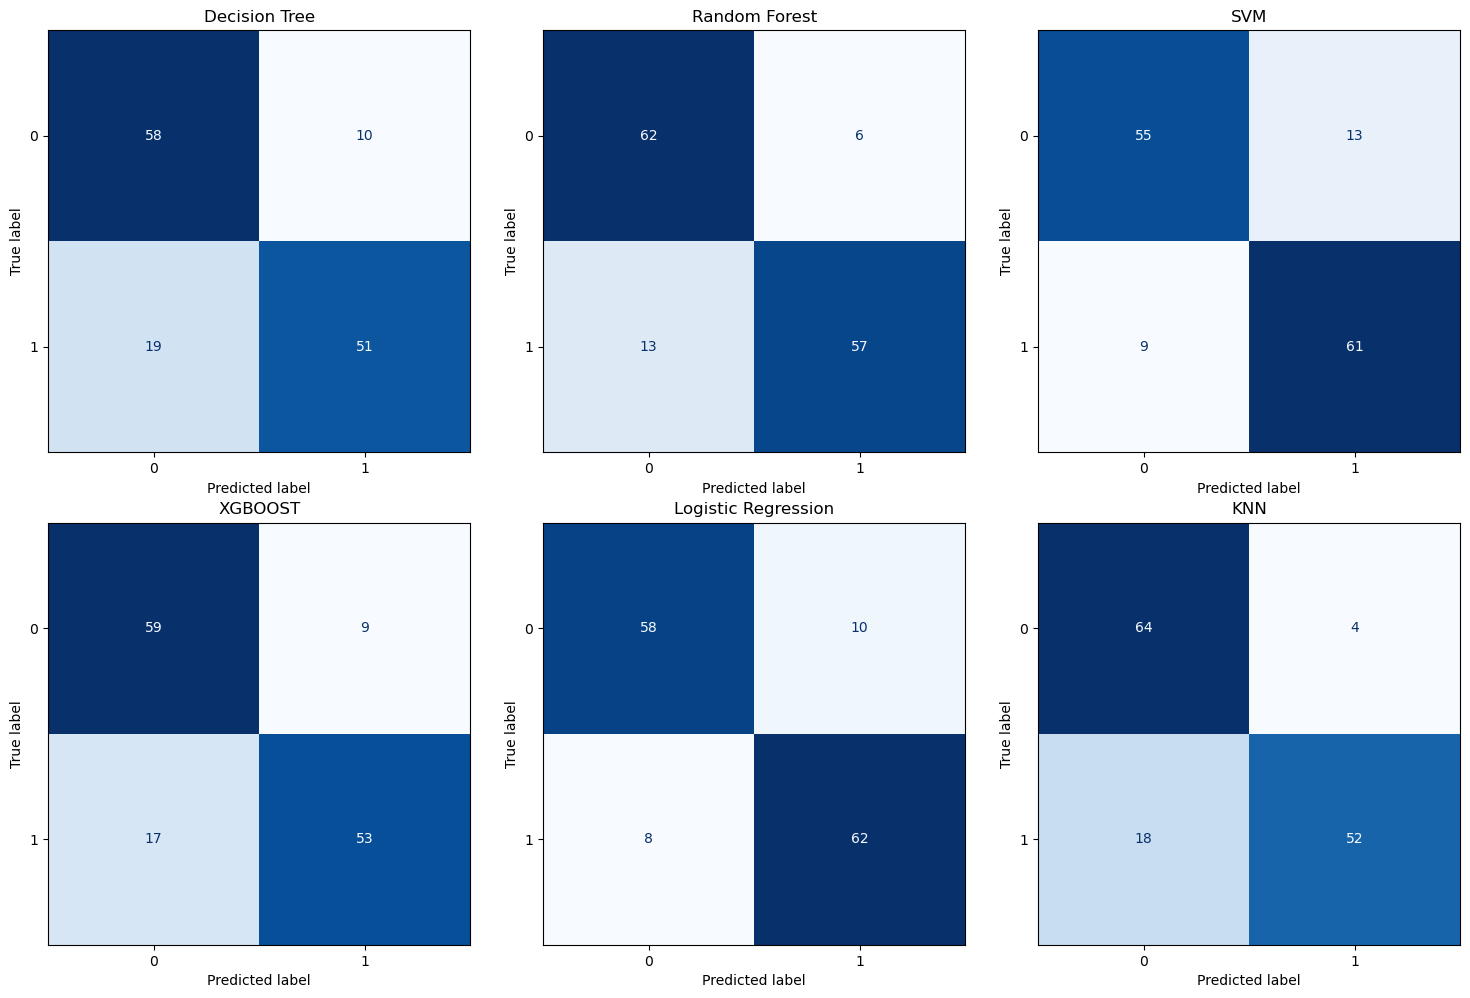

In [42]:
df_score = train_and_evaluate_models(
    X_train_encoded_no_discretization, X_test_encoded_no_discretization, y_train, y_test, df_score, 'No Discretization, Standard Scaler'
)

Decision Tree: Mean Accuracy = 0.794, Std = 0.033
Random Forest: Mean Accuracy = 0.873, Std = 0.013
SVM: Mean Accuracy = 0.869, Std = 0.033
XGBOOST: Mean Accuracy = 0.860, Std = 0.013
Logistic Regression: Mean Accuracy = 0.873, Std = 0.025
KNN: Mean Accuracy = 0.828, Std = 0.030
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.803738       0.887850  0.925234  0.859813             0.897196   
1       0.766355       0.869159  0.841121  0.850467             0.859813   
2       0.850467       0.878505  0.887850  0.869159             0.878505   
3       0.757009       0.850467  0.841121  0.841121             0.831776   
4       0.794393       0.878505  0.850467  0.878505             0.897196   

        KNN  
0  0.831776  
1  0.822430  
2  0.841121  
3  0.775701  
4  0.869159  
Decision Tree Test Accuracy: 0.858
Random Forest Test Accuracy: 0.851
SVM Test Accuracy: 0.836
XGBOOST Test Accuracy: 0.881
Logistic Regression Test Accuracy: 0.836
KNN Test Accur

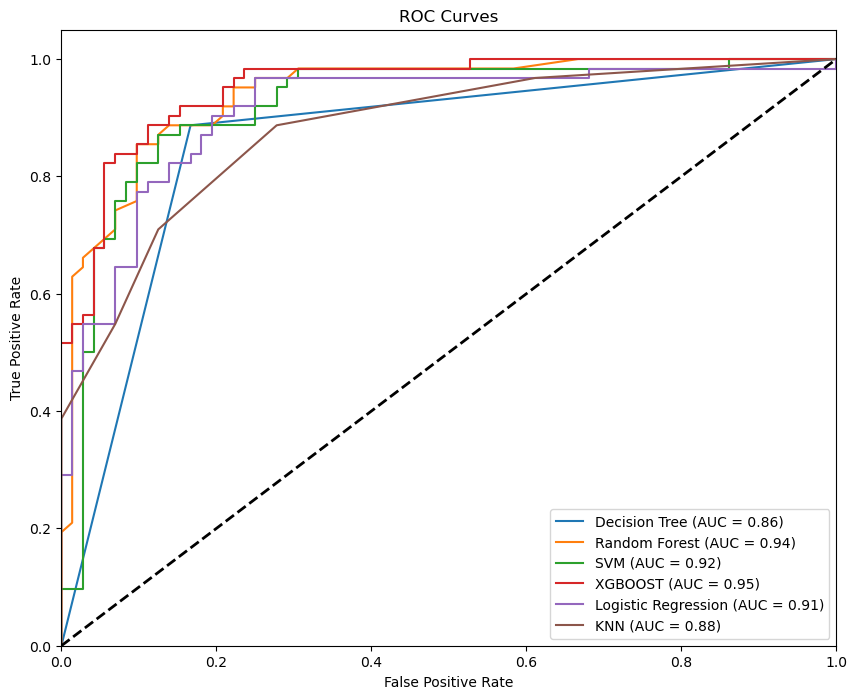

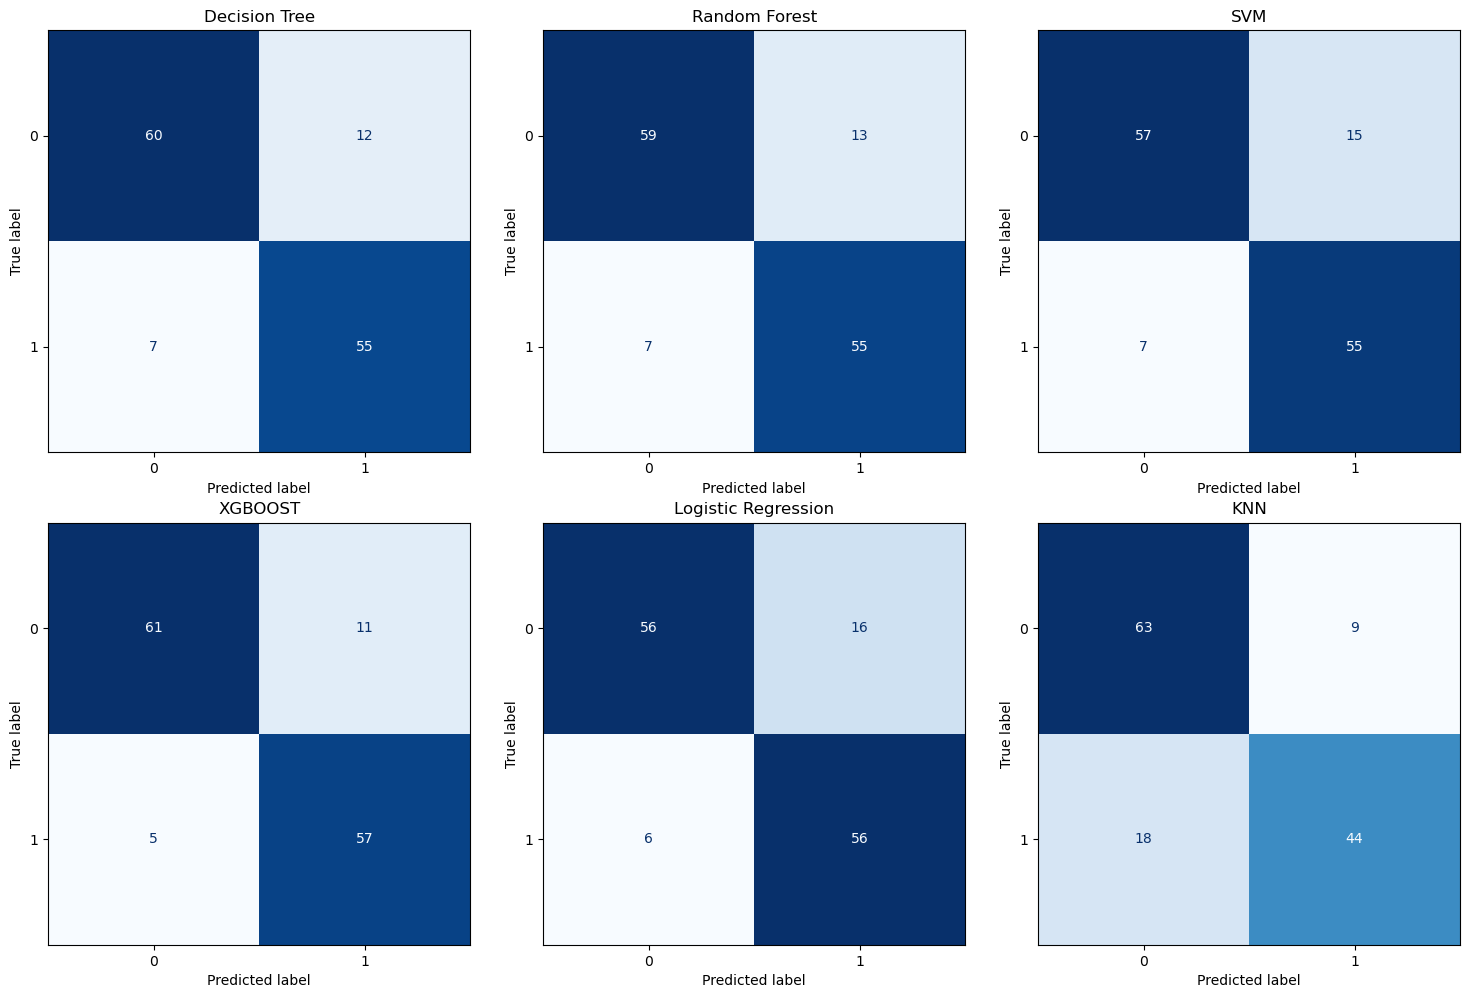

In [43]:
df_score = train_and_evaluate_models(
    X_train_encoded_no_discretization_drop, X_test_encoded_no_discretization_drop, y_train_drop, y_test_drop,
    df_score, 'No Discretization, Drop, Standard Scaler'
)

Decision Tree: Mean Accuracy = 0.791, Std = 0.042
Random Forest: Mean Accuracy = 0.871, Std = 0.016
SVM: Mean Accuracy = 0.869, Std = 0.031
XGBOOST: Mean Accuracy = 0.865, Std = 0.014
Logistic Regression: Mean Accuracy = 0.875, Std = 0.027
KNN: Mean Accuracy = 0.811, Std = 0.036
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.822430       0.897196  0.925234  0.878505             0.906542   
1       0.728972       0.869159  0.859813  0.869159             0.859813   
2       0.850467       0.878505  0.878505  0.859813             0.878505   
3       0.766355       0.850467  0.841121  0.841121             0.831776   
4       0.785047       0.859813  0.841121  0.878505             0.897196   

        KNN  
0  0.831776  
1  0.785047  
2  0.822430  
3  0.757009  
4  0.859813  
Decision Tree Test Accuracy: 0.843
Random Forest Test Accuracy: 0.836
SVM Test Accuracy: 0.828
XGBOOST Test Accuracy: 0.866
Logistic Regression Test Accuracy: 0.836
KNN Test Accur

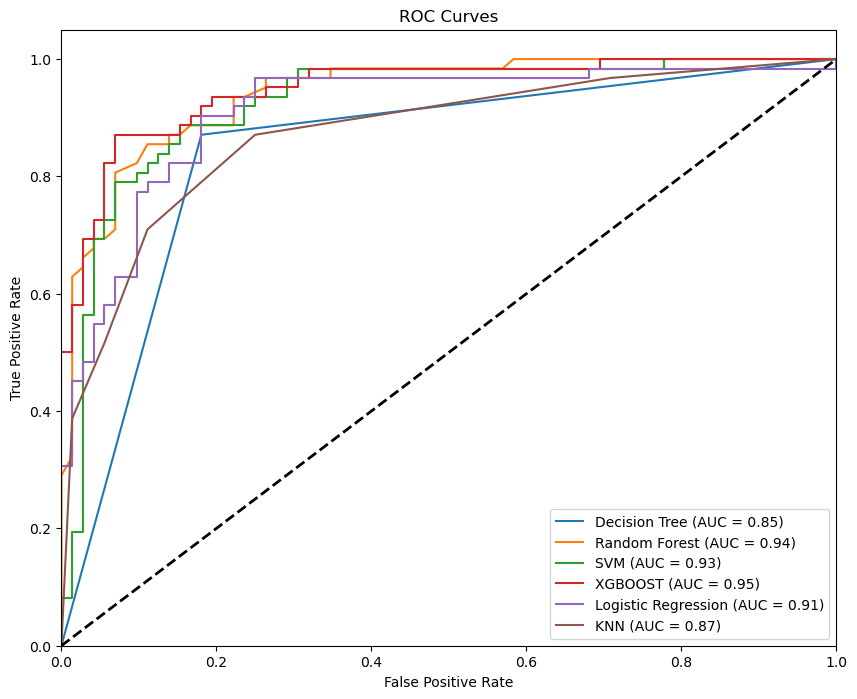

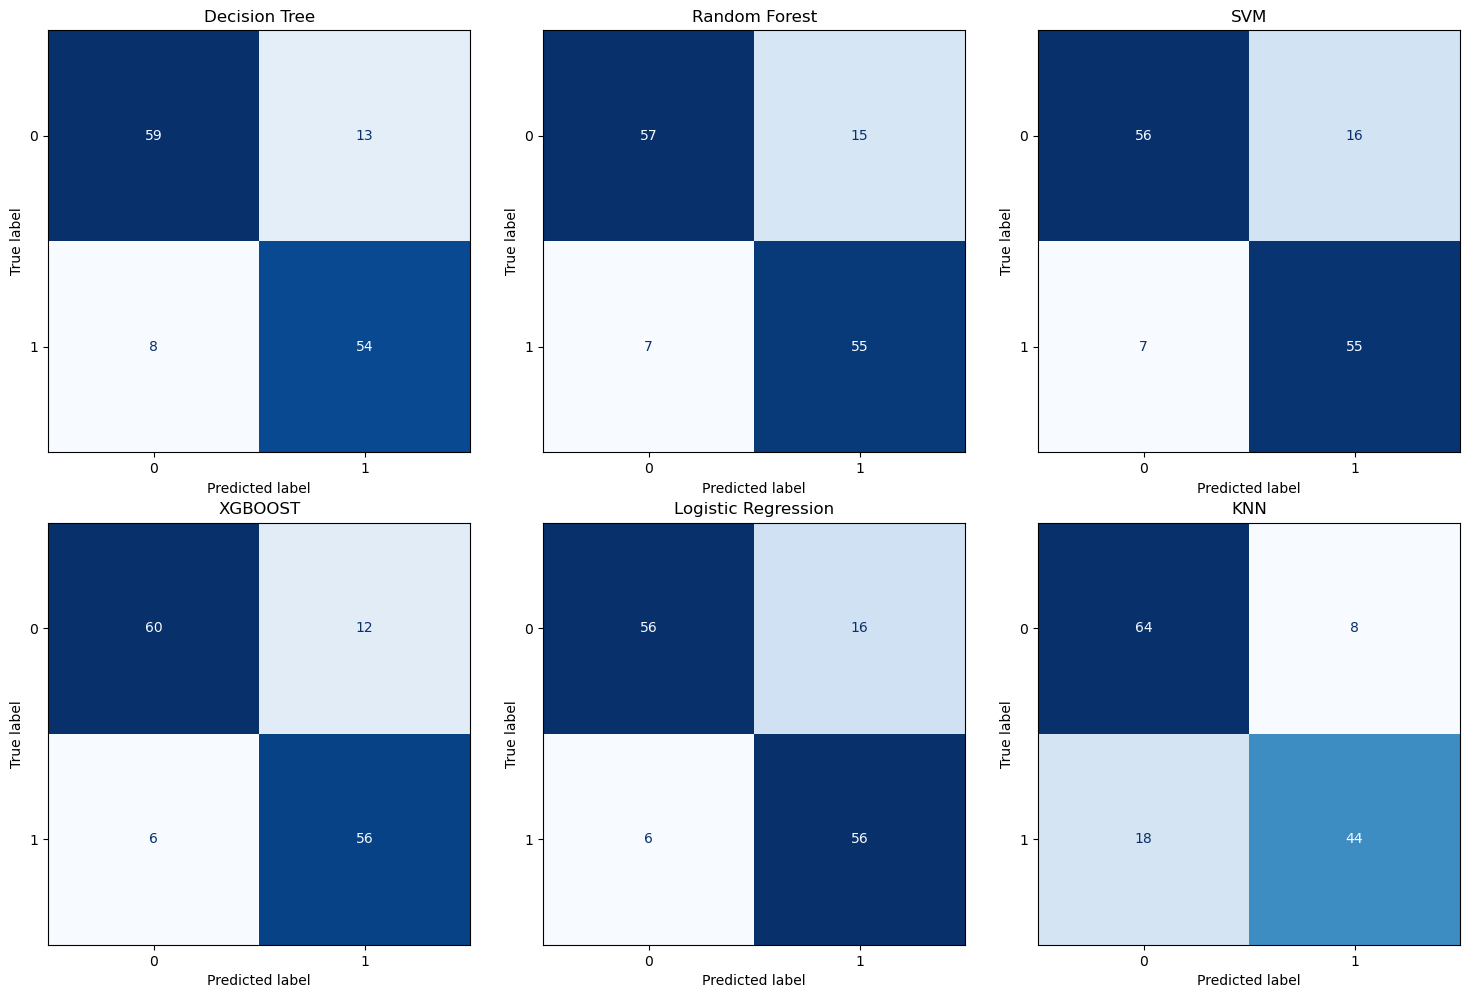

In [44]:
df_score = train_and_evaluate_models(
    X_train_encoded_drop, X_test_encoded_drop, y_train_drop, y_test_drop,
    df_score, 'Discretization, Drop, Standard Scaler'
)

Decision Tree: Mean Accuracy = 0.831, Std = 0.020
Random Forest: Mean Accuracy = 0.871, Std = 0.029
SVM: Mean Accuracy = 0.853, Std = 0.024
XGBOOST: Mean Accuracy = 0.862, Std = 0.043
Logistic Regression: Mean Accuracy = 0.862, Std = 0.039
KNN: Mean Accuracy = 0.837, Std = 0.031
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.855856       0.900901  0.873874  0.891892             0.882883   
1       0.819820       0.846847  0.810811  0.792793             0.819820   
2       0.818182       0.881818  0.845455  0.863636             0.854545   
3       0.854545       0.900000  0.872727  0.918182             0.927273   
4       0.809091       0.827273  0.863636  0.845455             0.827273   

        KNN  
0  0.846847  
1  0.828829  
2  0.854545  
3  0.872727  
4  0.781818  
Decision Tree Test Accuracy: 0.812
Random Forest Test Accuracy: 0.841
SVM Test Accuracy: 0.841
XGBOOST Test Accuracy: 0.826
Logistic Regression Test Accuracy: 0.841
KNN Test Accur

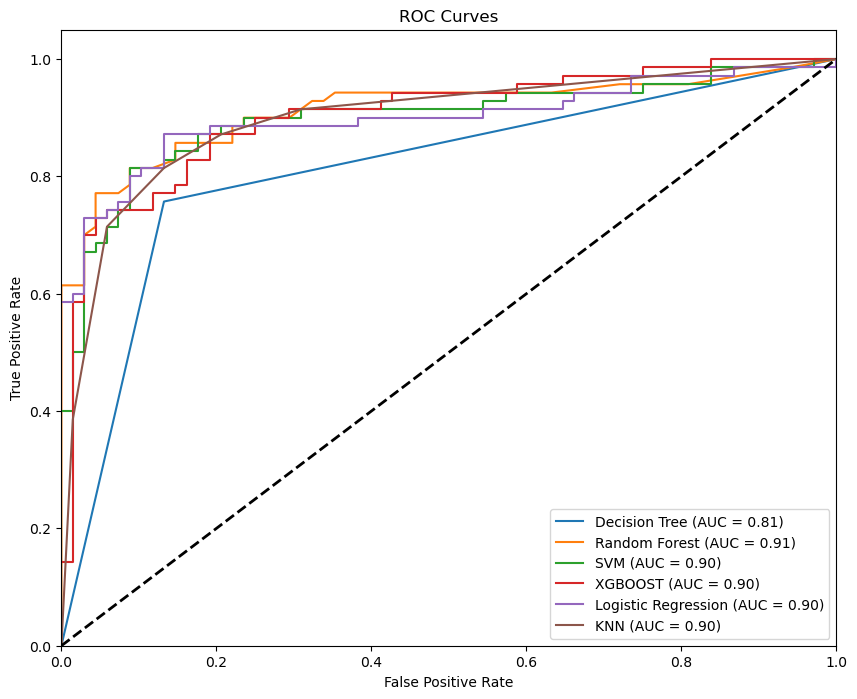

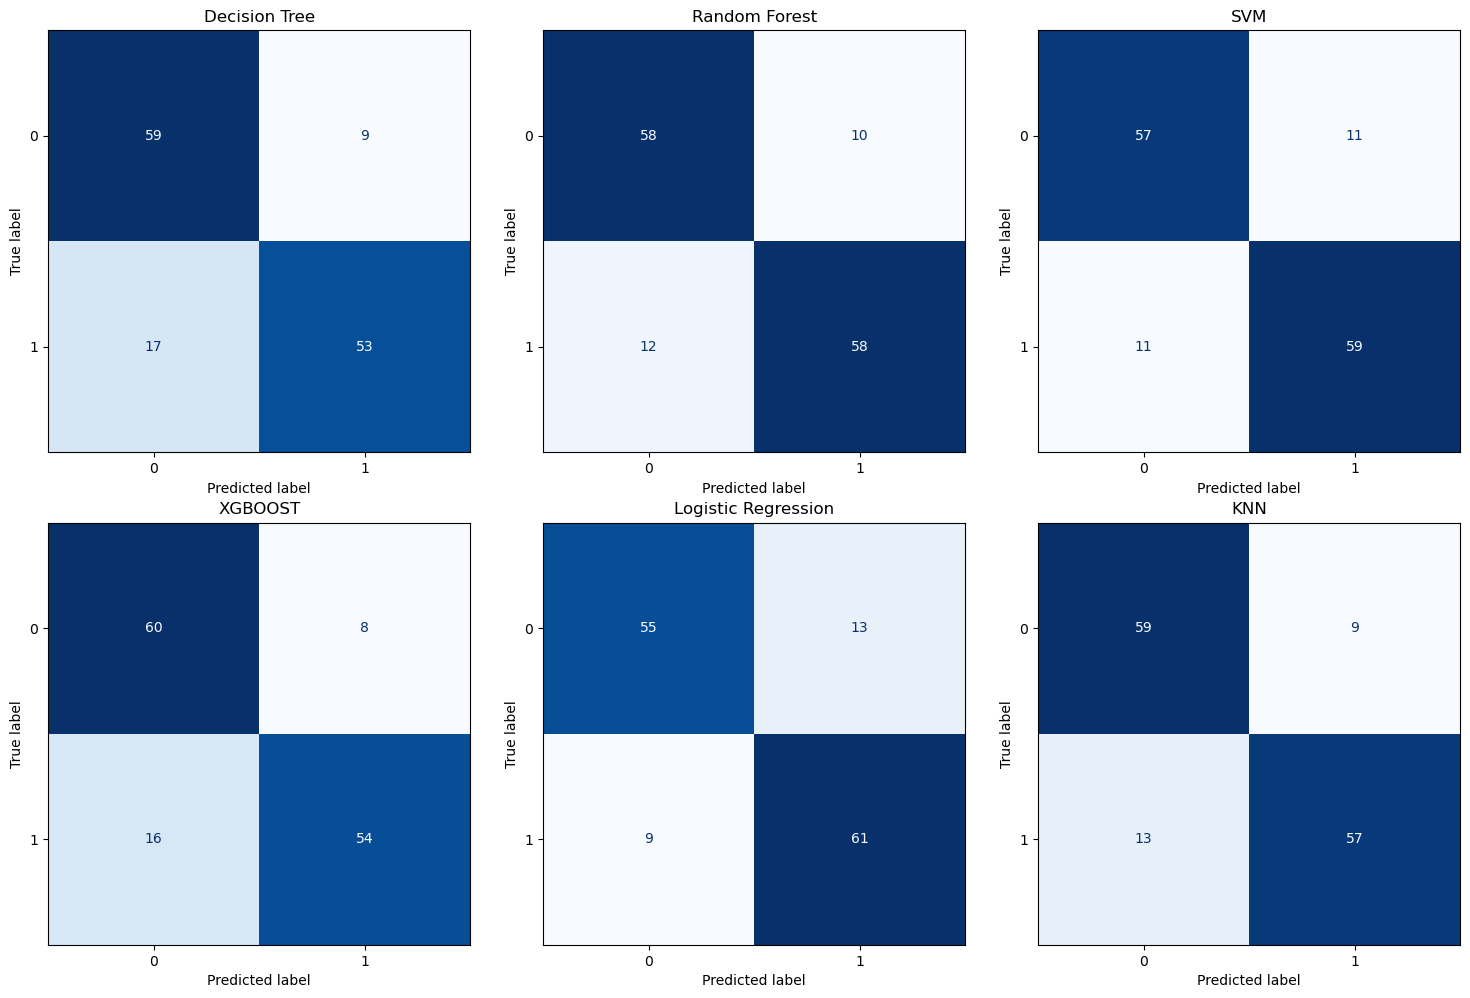

In [45]:
df_score = train_and_evaluate_models(
    X_train_encoded_minmax, X_test_encoded_minmax, y_train, y_test, df_score, 'Discretization, Minmax Scaler'
)

Decision Tree: Mean Accuracy = 0.794, Std = 0.033
Random Forest: Mean Accuracy = 0.873, Std = 0.013
SVM: Mean Accuracy = 0.873, Std = 0.026
XGBOOST: Mean Accuracy = 0.860, Std = 0.013
Logistic Regression: Mean Accuracy = 0.869, Std = 0.017
KNN: Mean Accuracy = 0.854, Std = 0.013
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.803738       0.887850  0.878505  0.859813             0.887850   
1       0.766355       0.869159  0.841121  0.850467             0.859813   
2       0.850467       0.878505  0.915888  0.869159             0.878505   
3       0.757009       0.850467  0.850467  0.841121             0.841121   
4       0.794393       0.878505  0.878505  0.878505             0.878505   

        KNN  
0  0.869159  
1  0.841121  
2  0.850467  
3  0.841121  
4  0.869159  
Decision Tree Test Accuracy: 0.858
Random Forest Test Accuracy: 0.851
SVM Test Accuracy: 0.851
XGBOOST Test Accuracy: 0.881
Logistic Regression Test Accuracy: 0.843
KNN Test Accur

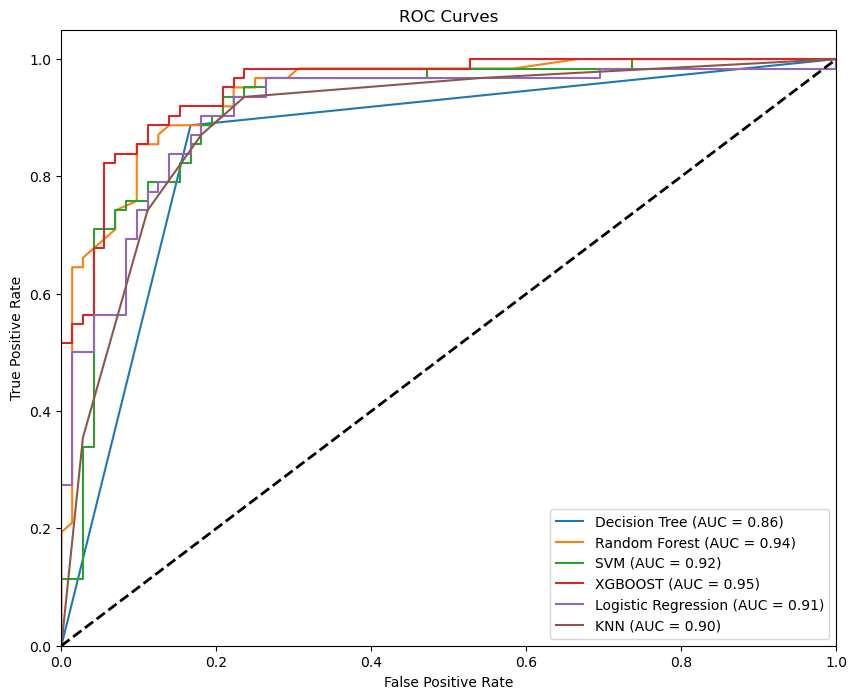

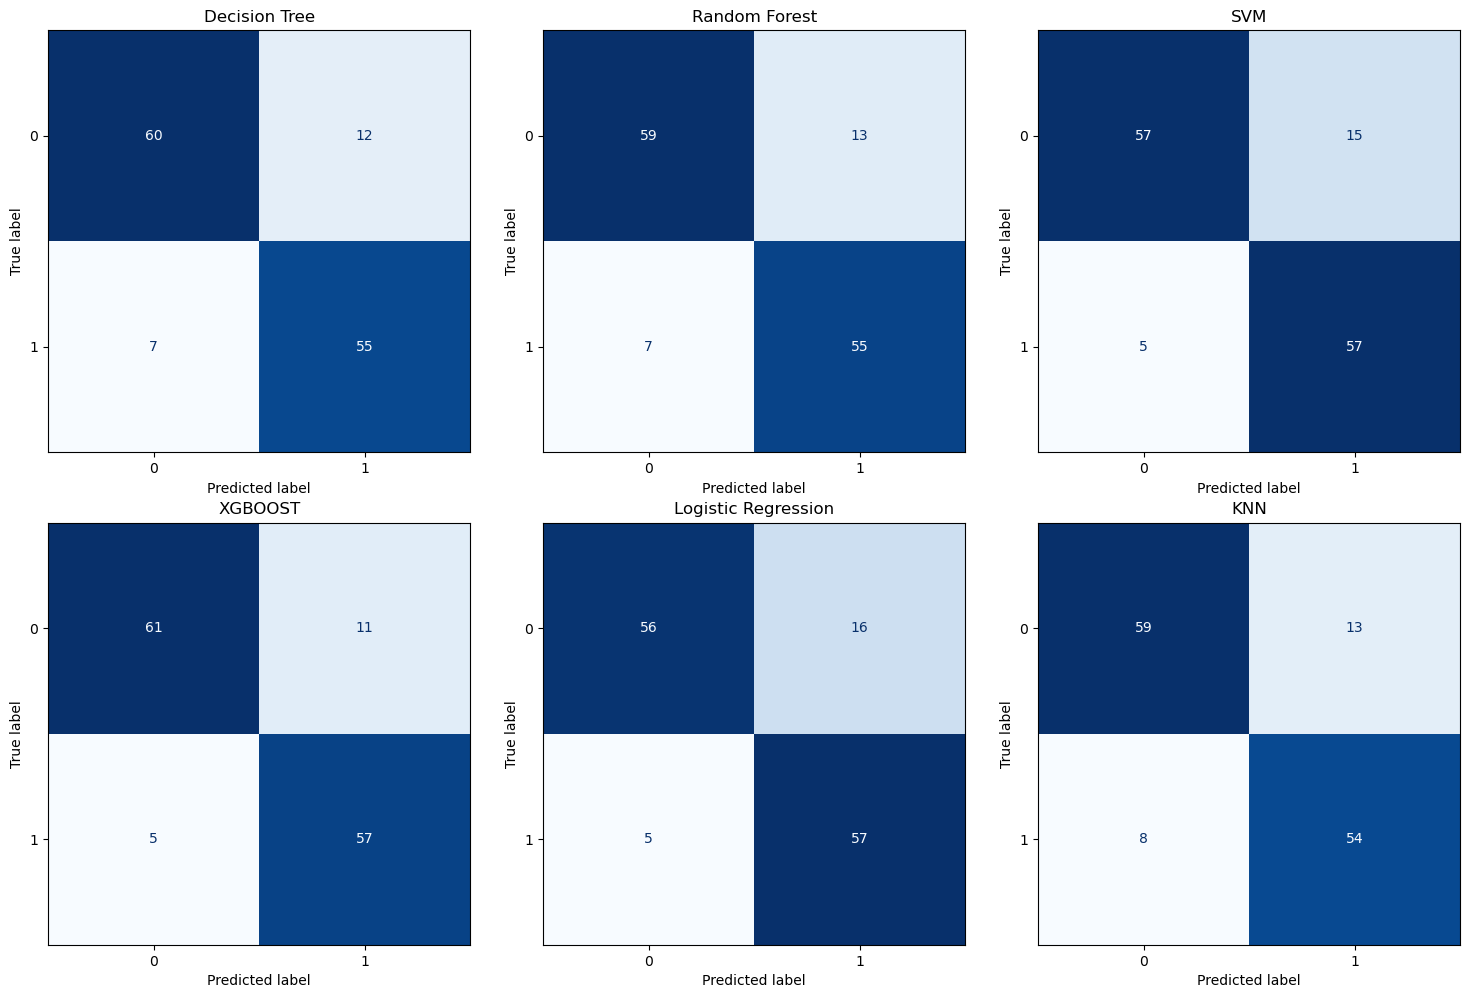

In [46]:
df_score = train_and_evaluate_models(
    X_train_encoded_no_discretization_drop_minmax, X_test_encoded_no_discretization_drop_minmax, y_train_drop, y_test_drop,
    df_score, 'No Discretization, Drop, Minmax Scaler'
)

Decision Tree: Mean Accuracy = 0.791, Std = 0.042
Random Forest: Mean Accuracy = 0.871, Std = 0.016
SVM: Mean Accuracy = 0.871, Std = 0.022
XGBOOST: Mean Accuracy = 0.865, Std = 0.014
Logistic Regression: Mean Accuracy = 0.865, Std = 0.018
KNN: Mean Accuracy = 0.847, Std = 0.013
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.822430       0.897196  0.887850  0.878505             0.878505   
1       0.728972       0.869159  0.841121  0.869159             0.859813   
2       0.850467       0.878505  0.897196  0.859813             0.878505   
3       0.766355       0.850467  0.850467  0.841121             0.831776   
4       0.785047       0.859813  0.878505  0.878505             0.878505   

        KNN  
0  0.859813  
1  0.822430  
2  0.850467  
3  0.850467  
4  0.850467  
Decision Tree Test Accuracy: 0.843
Random Forest Test Accuracy: 0.836
SVM Test Accuracy: 0.858
XGBOOST Test Accuracy: 0.866
Logistic Regression Test Accuracy: 0.843
KNN Test Accur

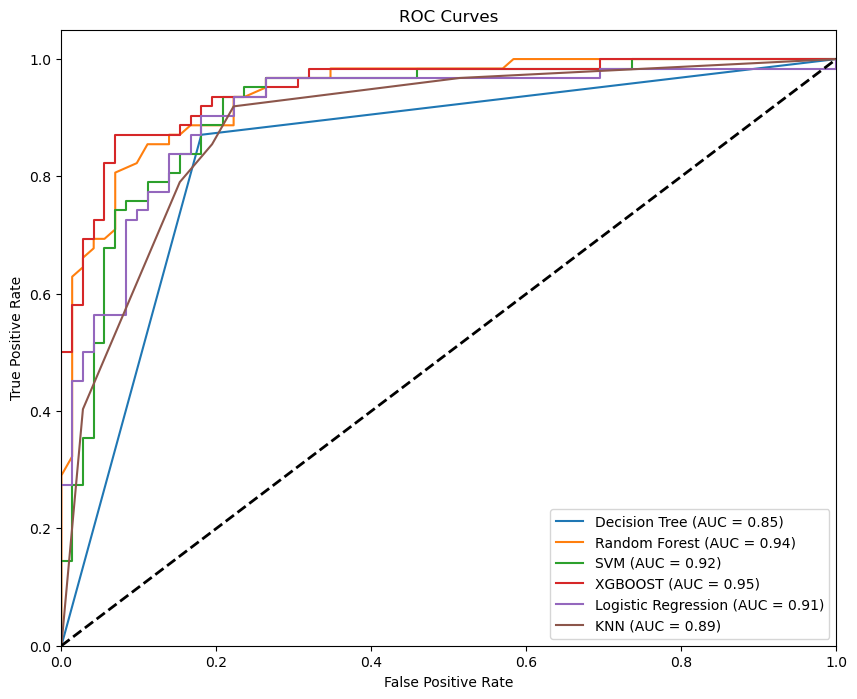

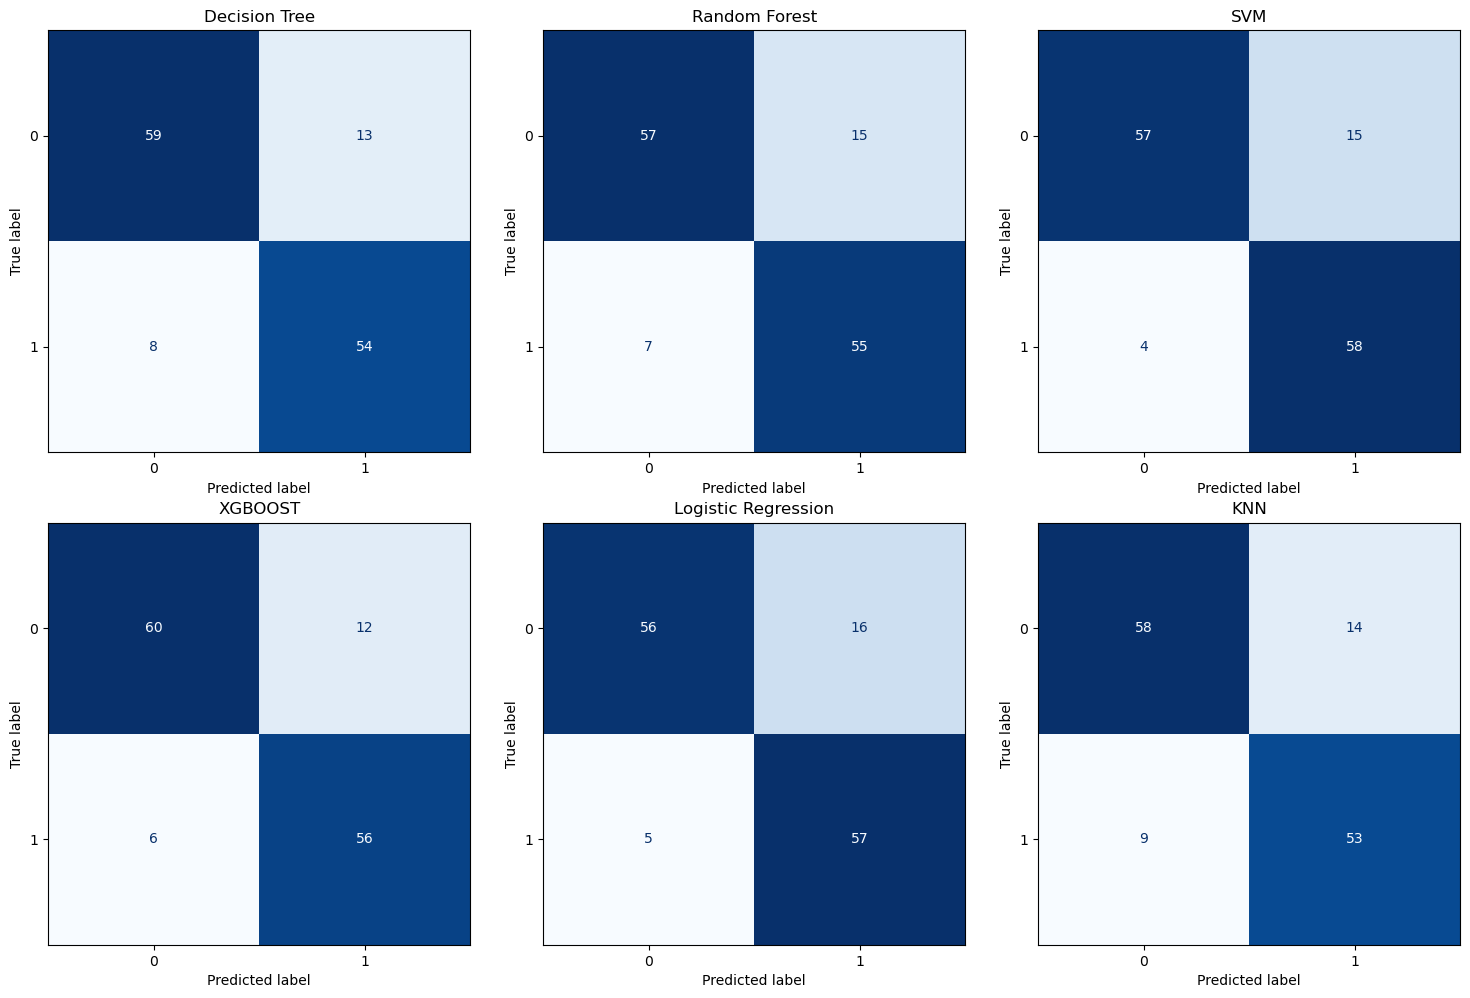

In [47]:
df_score = train_and_evaluate_models(
    X_train_encoded_drop_minmax, X_test_encoded_drop_minmax, y_train_drop, y_test_drop,
    df_score, 'Discretization, Drop, Minmax Scaler'
)

Decision Tree: Mean Accuracy = 0.835, Std = 0.029
Random Forest: Mean Accuracy = 0.866, Std = 0.023
SVM: Mean Accuracy = 0.851, Std = 0.027
XGBOOST: Mean Accuracy = 0.866, Std = 0.042
Logistic Regression: Mean Accuracy = 0.861, Std = 0.041
KNN: Mean Accuracy = 0.841, Std = 0.028
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.864865       0.882883  0.873874  0.882883             0.882883   
1       0.801802       0.855856  0.801802  0.801802             0.810811   
2       0.845455       0.854545  0.845455  0.872727             0.854545   
3       0.863636       0.900000  0.872727  0.927273             0.927273   
4       0.800000       0.836364  0.863636  0.845455             0.827273   

        KNN  
0  0.882883  
1  0.828829  
2  0.854545  
3  0.836364  
4  0.800000  
Decision Tree Test Accuracy: 0.790
Random Forest Test Accuracy: 0.862
SVM Test Accuracy: 0.848
XGBOOST Test Accuracy: 0.812
Logistic Regression Test Accuracy: 0.848
KNN Test Accur

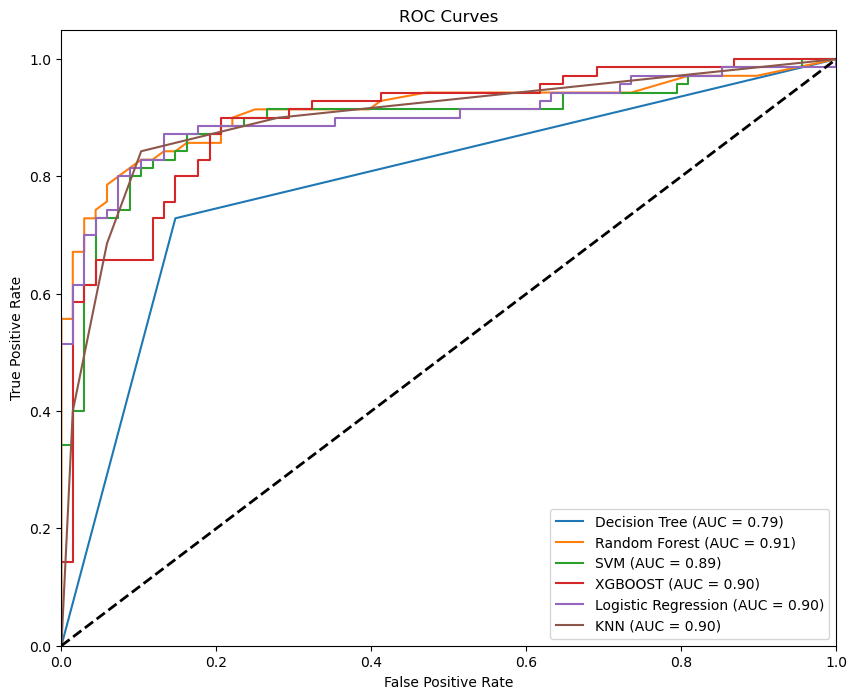

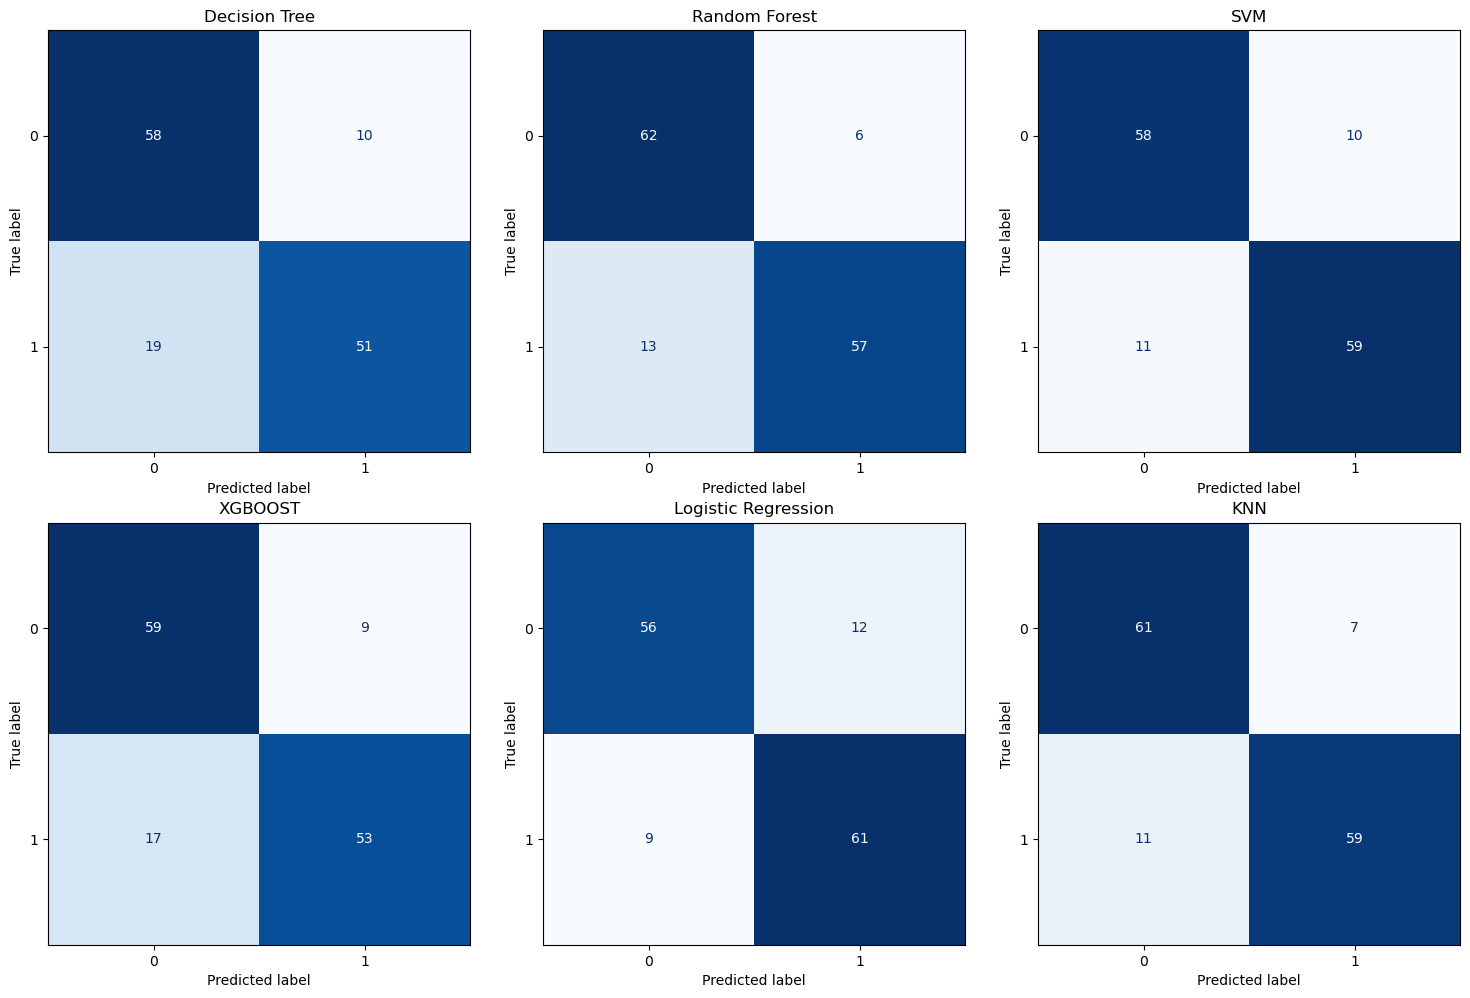

In [48]:
df_score = train_and_evaluate_models(
    X_train_encoded_no_discretization_minmax, X_test_encoded_no_discretization_minmax, y_train, y_test,
    df_score, 'No Discretization, Minmax Scaler'
)

In [49]:
df_score

,Dataset,Decision Tree,Random Forest,SVM,XGBOOST,Logistic Regression,KNN
0,"Discretization, Standard Scaler",0.811594,0.840580,0.833333,0.826087,0.869565,0.818841
1,"No Discretization, Standard Scaler",0.789855,0.862319,0.840580,0.811594,0.869565,0.840580
2,"No Discretization, Drop, Standard Scaler",0.858209,0.850746,0.835821,0.880597,0.835821,0.798507
3,"Discretization, Drop, Standard Scaler",0.843284,0.835821,0.828358,0.865672,0.835821,0.805970
4,"Discretization, Minmax Scaler",0.811594,0.840580,0.840580,0.826087,0.840580,0.840580
5,"No Discretization, Drop, Minmax Scaler",0.858209,0.850746,0.850746,0.880597,0.843284,0.843284
6,"Discretization, Drop, Minmax Scaler",0.843284,0.835821,0.858209,0.865672,0.843284,0.828358
7,"No Discretization, Minmax Scaler",0.789855,0.862319,0.847826,0.811594,0.847826,0.869565


In [50]:
xgb_param_grid = {
    'n_estimators': [50, 300, 50],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'subsample': [0.4, 1, 0.1],
    'max_depth': [3, 10, 1],
    'min_child_weight': [1, 2, 3, 5, 7, 10],
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
}

xgboost = XGBClassifier(random_state=42)

xgb_random_search = RandomizedSearchCV(
    estimator=xgboost,
    param_distributions=xgb_param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random_search.fit(X_train_encoded_no_discretization_drop_minmax, y_train_drop)

xgb_best_params = xgb_random_search.best_params_
print(xgb_random_search.best_params_)
print(xgb_random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'subsample': 1, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2}
0.8822429906542057


In [51]:
xgb_param_grid = {
    'n_estimators': [45, 50, 55],
    'learning_rate': [0.5, 0.1, 1.5],
    'subsample': [0.9, 1, 1.1],
    'max_depth': [2, 3, 4],
    'min_child_weight': [2, 3, 4],
    'gamma': [0.1, 0.2, 0.3],
}


xgb_grid_search = GridSearchCV(
    estimator=xgboost,
    param_grid=xgb_param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

xgb_grid_search.fit(X_train_encoded_no_discretization_drop_minmax, y_train_drop)

xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_
xgb_test_accuracy = accuracy_score(y_test_drop, xgb_best_model.predict(X_test_encoded_no_discretization_drop_minmax))
print(f'XGBoost Hyperparam Accuracy: {xgb_test_accuracy}')

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
XGBoost Hyperparam Accuracy: 0.8507462686567164


In [52]:
lr_param_grid = {
    'penalty': ['l2', 'none'],
    'C': [0.1, 10, 0.1],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

logistic_regression = LogisticRegression(max_iter=500, random_state=42)

lr_random_search = RandomizedSearchCV(
    estimator=logistic_regression,
    param_distributions=lr_param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

lr_random_search.fit(X_train_encoded, y_train)

lr_best_params = lr_random_search.best_params_
print(lr_random_search.best_params_)
print(lr_random_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
0.8677149877149877


In [53]:
lr_param_grid = {
    'penalty': ['l2'],
    'C': [0.5, 0.1, 1.5],
    'solver': ['lbfgs']
}

lr_grid_search = GridSearchCV(
    estimator=logistic_regression,
    param_grid=lr_param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

lr_grid_search.fit(X_train_encoded, y_train)

lr_best_params = lr_grid_search.best_params_
lr_best_model = lr_grid_search.best_estimator_
lr_test_accuracy = accuracy_score(y_test, lr_best_model.predict(X_test_encoded))
print(f'Logistic Regression Hyperparam Accuracy: {lr_test_accuracy}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Logistic Regression Hyperparam Accuracy: 0.855072463768116


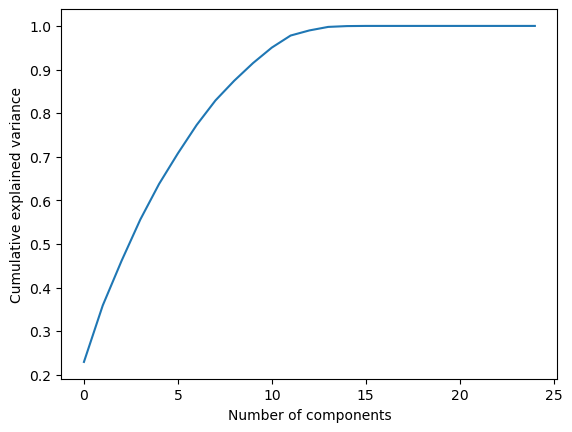

In [54]:
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_encoded)
X_test_pca = pca.transform(X_test_encoded)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [55]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_encoded)
X_test_pca = pca.transform(X_test_encoded)

X_train_encoded_no_discretization_drop_pca  = pca.fit_transform(X_train_encoded_no_discretization_drop_minmax)
X_test_encoded_no_discretization_drop_pca = pca.transform(X_test_encoded_no_discretization_drop_minmax)

In [56]:
n_components

11

In [57]:
X_train_pca.shape

(552, 11)

In [58]:
xgb_grid_search.fit(X_train_encoded_no_discretization_drop_pca, y_train_drop)

xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_
xgb_test_pca_accuracy = accuracy_score(y_test_drop, xgb_best_model.predict(X_test_encoded_no_discretization_drop_pca))
print(f'XGBoost Hyperparam + PCA Accuracy: {xgb_test_pca_accuracy}')

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
XGBoost Hyperparam + PCA Accuracy: 0.8059701492537313


Decision Tree: Mean Accuracy = 0.804, Std = 0.026
Random Forest: Mean Accuracy = 0.869, Std = 0.017
SVM: Mean Accuracy = 0.873, Std = 0.023
XGBOOST: Mean Accuracy = 0.845, Std = 0.024
Logistic Regression: Mean Accuracy = 0.867, Std = 0.020
KNN: Mean Accuracy = 0.860, Std = 0.010
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.775701       0.878505  0.897196  0.822430             0.878505   
1       0.785047       0.841121  0.841121  0.813084             0.859813   
2       0.850467       0.878505  0.887850  0.859813             0.878505   
3       0.794393       0.859813  0.850467  0.850467             0.831776   
4       0.813084       0.887850  0.887850  0.878505             0.887850   

        KNN  
0  0.878505  
1  0.850467  
2  0.850467  
3  0.859813  
4  0.859813  
Decision Tree Test Accuracy: 0.784
Random Forest Test Accuracy: 0.836
SVM Test Accuracy: 0.851
XGBOOST Test Accuracy: 0.813
Logistic Regression Test Accuracy: 0.866
KNN Test Accur

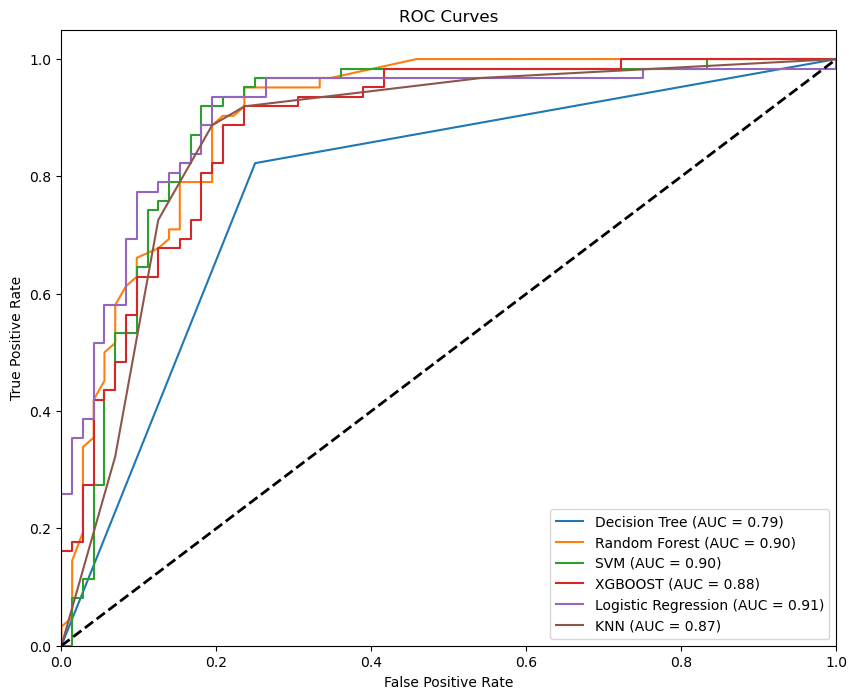

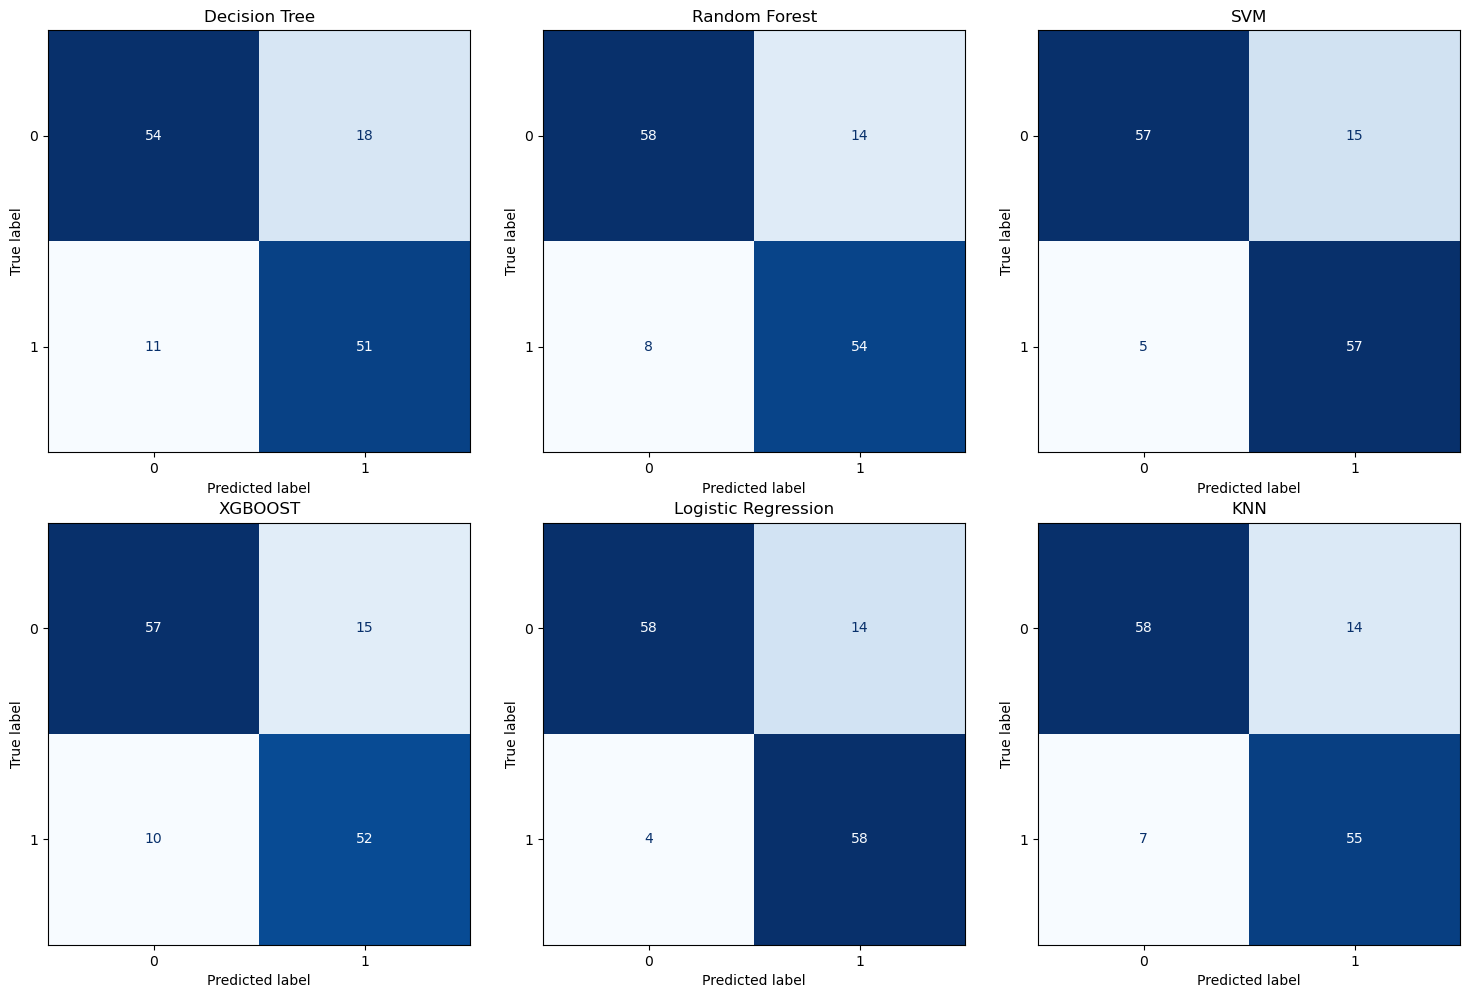

In [59]:
df_score = train_and_evaluate_models(
    X_train_encoded_no_discretization_drop_pca, X_test_encoded_no_discretization_drop_pca, y_train_drop, y_test_drop,
    df_score, 'No Discretization, Drop, PCA'
)

In [60]:
lr_grid_search.fit(X_train_pca, y_train)

lr_best_params = lr_grid_search.best_params_
lr_best_model = lr_grid_search.best_estimator_
lr_test_pca_accuracy = accuracy_score(y_test, lr_best_model.predict(X_test_pca))
print(f'Logistic Regression Hyperparam + PCA Accuracy: {lr_test_pca_accuracy}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Logistic Regression Hyperparam + PCA Accuracy: 0.7971014492753623


Decision Tree: Mean Accuracy = 0.719, Std = 0.025
Random Forest: Mean Accuracy = 0.801, Std = 0.034
SVM: Mean Accuracy = 0.797, Std = 0.031
XGBOOST: Mean Accuracy = 0.784, Std = 0.029
Logistic Regression: Mean Accuracy = 0.795, Std = 0.038
KNN: Mean Accuracy = 0.768, Std = 0.036
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.720721       0.837838  0.837838  0.810811             0.837838   
1       0.702703       0.792793  0.783784  0.756757             0.783784   
2       0.681818       0.790909  0.800000  0.790909             0.809091   
3       0.745455       0.836364  0.818182  0.818182             0.818182   
4       0.745455       0.745455  0.745455  0.745455             0.727273   

        KNN  
0  0.819820  
1  0.756757  
2  0.727273  
3  0.800000  
4  0.736364  
Decision Tree Test Accuracy: 0.696
Random Forest Test Accuracy: 0.790
SVM Test Accuracy: 0.804
XGBOOST Test Accuracy: 0.775
Logistic Regression Test Accuracy: 0.797
KNN Test Accur

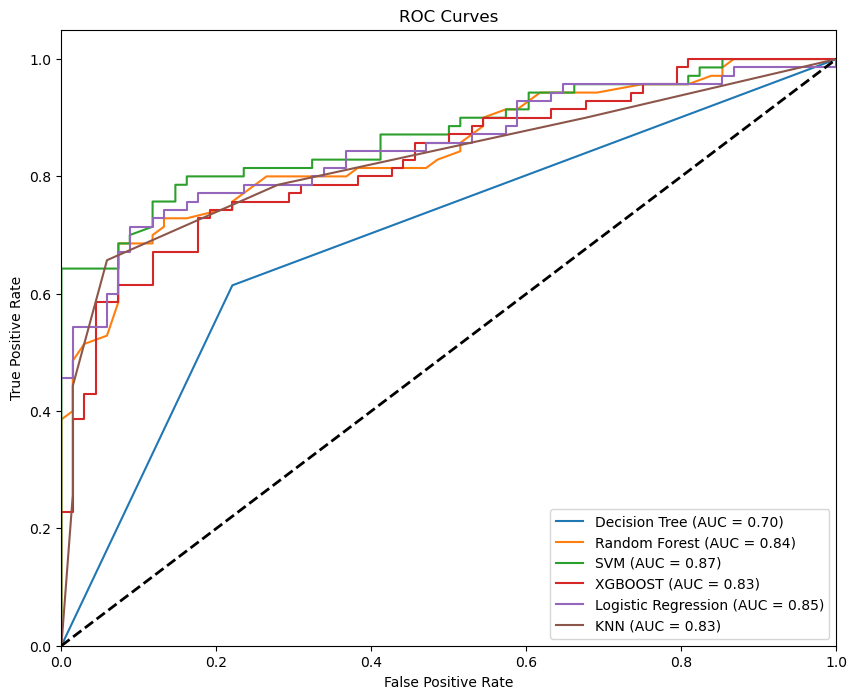

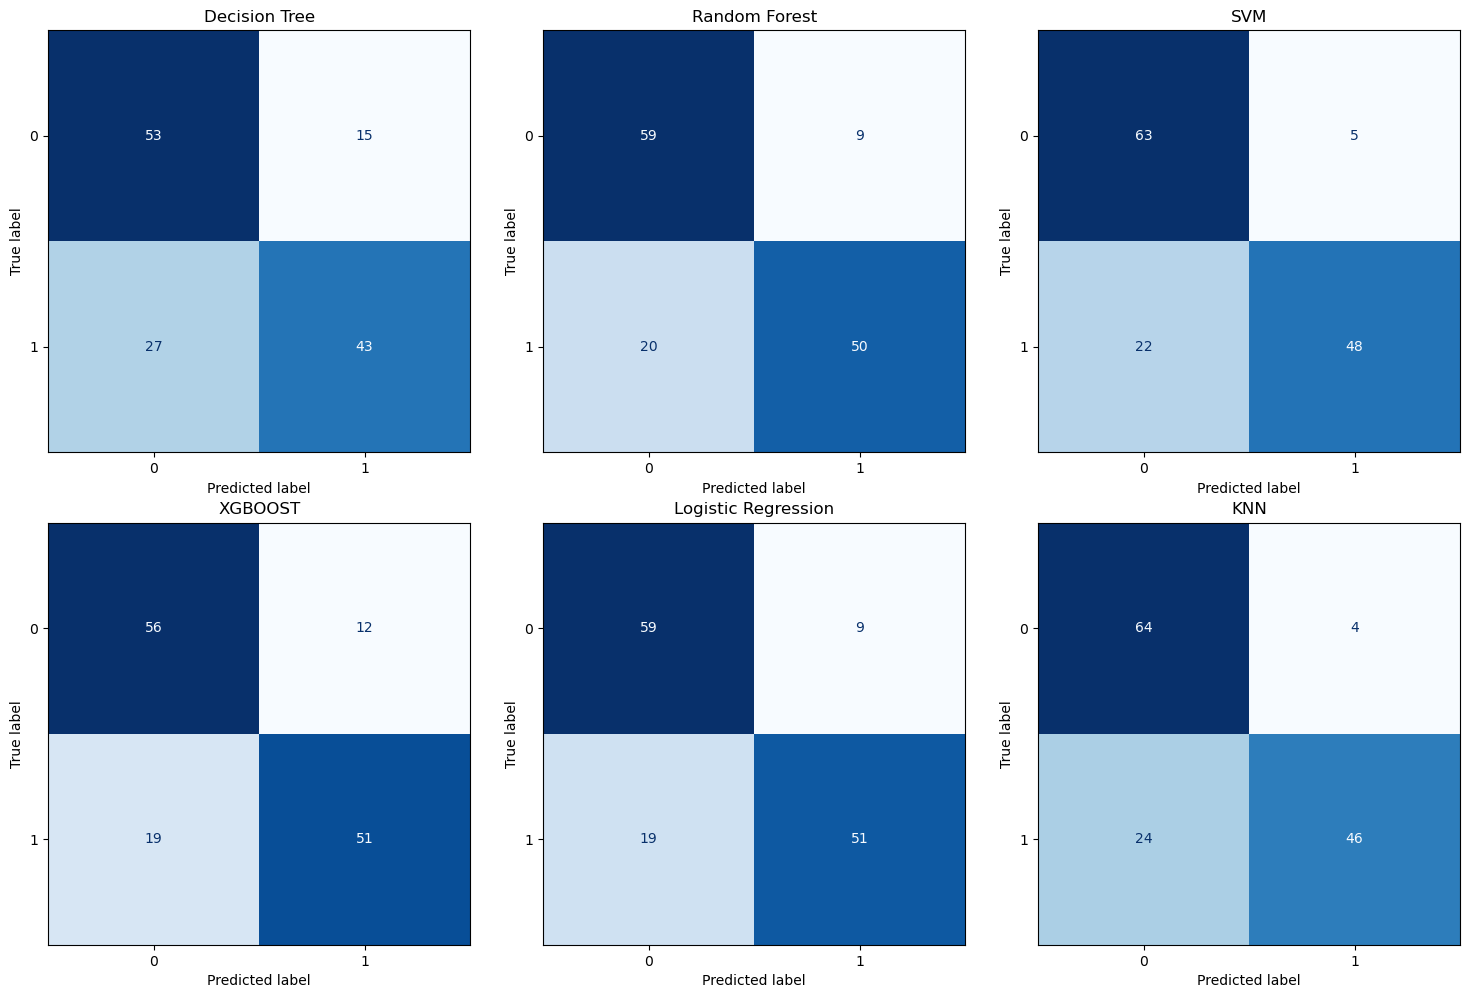

In [61]:
df_score = train_and_evaluate_models(
    X_train_pca, X_test_pca, y_train, y_test, df_score, 'Discretization, Standard Scaler, PCA'
)

In [62]:
df_score

,Dataset,Decision Tree,Random Forest,SVM,XGBOOST,Logistic Regression,KNN
0,"Discretization, Standard Scaler",0.811594,0.840580,0.833333,0.826087,0.869565,0.818841
1,"No Discretization, Standard Scaler",0.789855,0.862319,0.840580,0.811594,0.869565,0.840580
2,"No Discretization, Drop, Standard Scaler",0.858209,0.850746,0.835821,0.880597,0.835821,0.798507
3,"Discretization, Drop, Standard Scaler",0.843284,0.835821,0.828358,0.865672,0.835821,0.805970
4,"Discretization, Minmax Scaler",0.811594,0.840580,0.840580,0.826087,0.840580,0.840580
5,"No Discretization, Drop, Minmax Scaler",0.858209,0.850746,0.850746,0.880597,0.843284,0.843284
6,"Discretization, Drop, Minmax Scaler",0.843284,0.835821,0.858209,0.865672,0.843284,0.828358
7,"No Discretization, Minmax Scaler",0.789855,0.862319,0.847826,0.811594,0.847826,0.869565
8,"No Discretization, Drop, PCA",0.783582,0.835821,0.850746,0.813433,0.865672,0.843284
9,"Discretization, Standard Scaler, PCA",0.695652,0.789855,0.804348,0.775362,0.797101,0.797101


In [63]:
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data = {'Feature Names': feature_names, 'Importance': feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['Importance'], ascending=False, inplace=True)
    
    plt.figure(figsize=(10, 8))
    plt.title(f'{model_type} Feature Importance')
    plt.barh(fi_df['Feature Names'], fi_df['Importance'])
    plt.gca().invert_yaxis()
    plt.show()
    return fi_df

In [64]:
def feature_importance(X_train, X_test, y_train, y_test, df_score, dataset_name, feature_names):
    # So KNN stops complaining
    X_train_encoded = np.ascontiguousarray(X_train)
    X_test_encoded = np.ascontiguousarray(X_test)

    xgboost = XGBClassifier(random_state=42)
    logistic_regression = LogisticRegression(random_state=42)
    lasso = Lasso(random_state=42, alpha=0.00001)

    models = {
        'XGBOOST': xgboost,
        'Logistic Regression': logistic_regression,
        'Lasso': lasso
    }

    cv_results = {}
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        scores = cross_val_score(model, X_train_encoded, y_train, cv=kf, scoring='accuracy')
        cv_results[name] = scores
        print(f'{name}: Mean Accuracy = {scores.mean():.3f}, Std = {scores.std():.3f}')

    cv_results_df = pd.DataFrame(cv_results)
    print(cv_results_df)

    test_results = {'Dataset': dataset_name}

    for name, model in models.items():
        model.fit(X_train_encoded, y_train)
        if name == 'Lasso':
            y_pred = model.predict(X_test_encoded)
            mse = mean_squared_error(y_test, y_pred)
            test_results[name] = mse
            print(f'{name} Test Mean Squared Error: {mse:.3f}')
        else:
            y_pred = model.predict(X_test_encoded)
            accuracy = accuracy_score(y_test, y_pred)
            test_results[name] = accuracy
            print(f'{name} Test Accuracy: {accuracy:.3f}')

    model = models['XGBOOST']
    model.fit(X_train_encoded, y_train)
    plot_feature_importance(model.feature_importances_, feature_names, 'XGBOOST')

    model = models['Logistic Regression']
    model.fit(X_train_encoded, y_train)
    plot_feature_importance(model.coef_[0], feature_names, 'Logistic Regression')
    
    model = models['Lasso']
    model.fit(X_train_encoded, y_train)
    df_lasso = plot_feature_importance(model.coef_, feature_names, 'Lasso Regression')

    test_results_df = pd.DataFrame(test_results, index=[0])
    
    df_score = pd.concat([df_score, test_results_df], ignore_index=True)
    return df_score, df_lasso

XGBOOST: Mean Accuracy = 0.862, Std = 0.043
Logistic Regression: Mean Accuracy = 0.868, Std = 0.047
Lasso: Mean Accuracy = nan, Std = nan
    XGBOOST  Logistic Regression  Lasso
0  0.891892             0.891892    NaN
1  0.792793             0.810811    NaN
2  0.863636             0.881818    NaN
3  0.918182             0.936364    NaN
4  0.845455             0.818182    NaN
XGBOOST Test Accuracy: 0.826
Logistic Regression Test Accuracy: 0.870
Lasso Test Mean Squared Error: 0.128


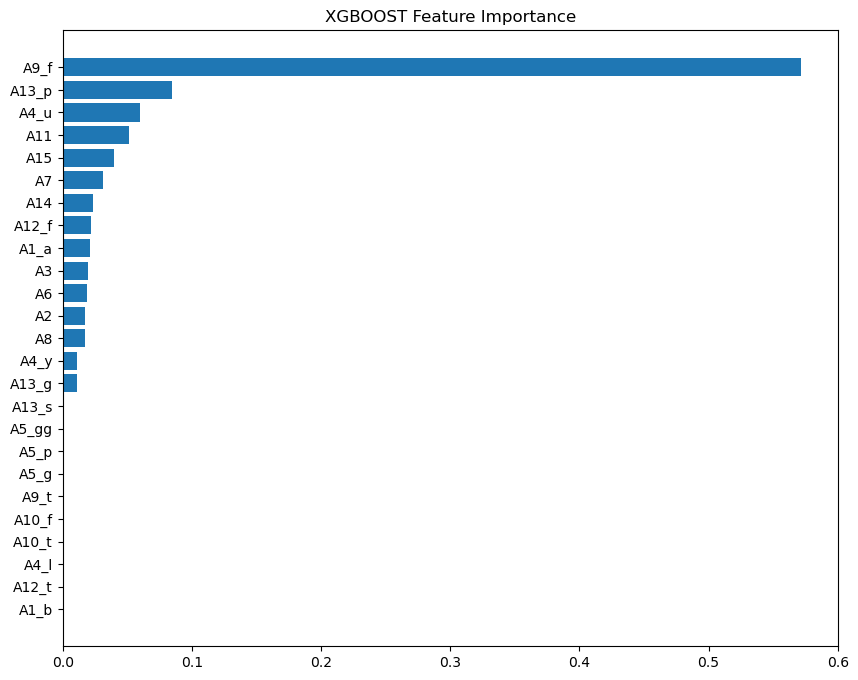

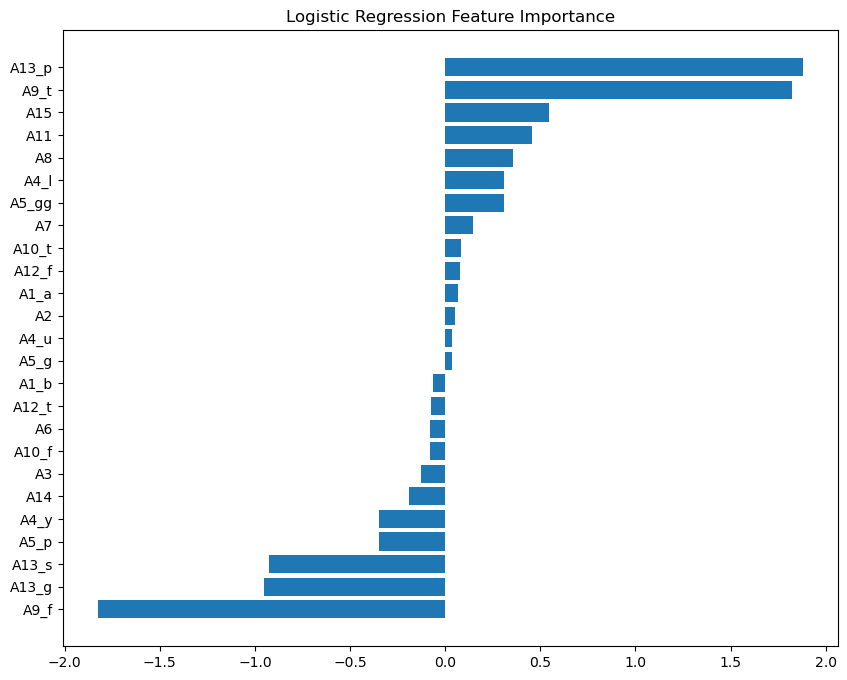

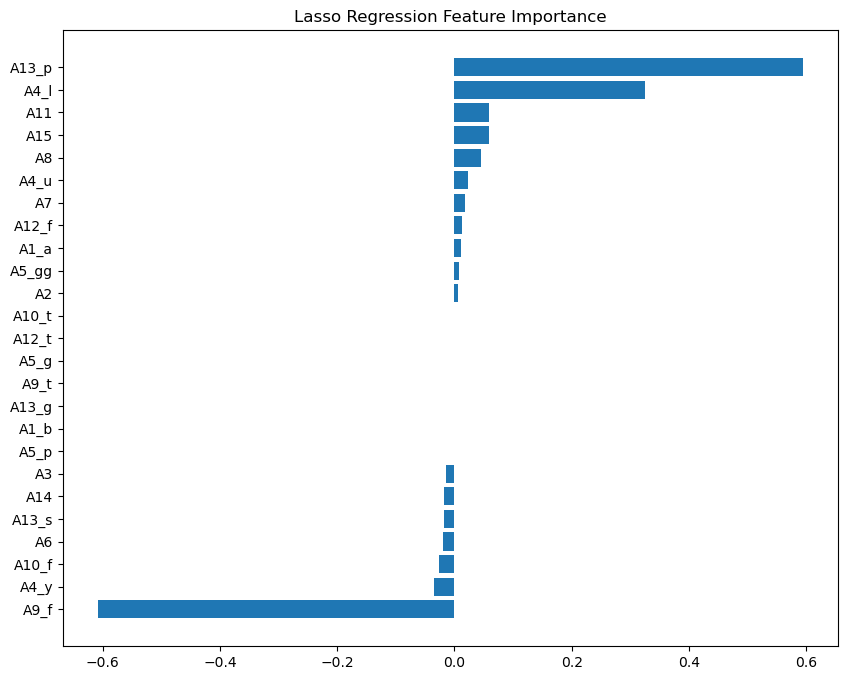

In [65]:
df_score, df_lasso = feature_importance(
    X_train_encoded, X_test_encoded, y_train, y_test, df_score,
    'feature importance test lr', X_train_encoded.columns
)

In [66]:
df_lasso

,Feature Names,Importance
23,A13_p,5.936964e-01
10,A4_l,3.244041e-01
5,A11,5.841503e-02
7,A15,5.830522e-02
4,A8,4.467112e-02
11,A4_u,2.226182e-02
1,A7,1.715262e-02
20,A12_f,1.355778e-02
8,A1_a,1.169622e-02
14,A5_gg,7.966470e-03


In [69]:
lr_features = ['A9_f', 'A13_g', 'A13_s', 'A13_p', 'A9_t']

X_train_lr_features = X_train_encoded[lr_features]
X_test_lr_featuresltered = X_test_encoded[lr_features]

Decision Tree: Mean Accuracy = 0.857, Std = 0.025
Random Forest: Mean Accuracy = 0.855, Std = 0.025
SVM: Mean Accuracy = 0.855, Std = 0.025
XGBOOST: Mean Accuracy = 0.857, Std = 0.025
Logistic Regression: Mean Accuracy = 0.862, Std = 0.032
KNN: Mean Accuracy = 0.864, Std = 0.020
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.864865       0.864865  0.864865  0.864865             0.873874   
1       0.810811       0.810811  0.810811  0.810811             0.810811   
2       0.872727       0.872727  0.872727  0.872727             0.863636   
3       0.881818       0.881818  0.881818  0.881818             0.909091   
4       0.854545       0.845455  0.845455  0.854545             0.854545   

        KNN  
0  0.882883  
1  0.828829  
2  0.872727  
3  0.881818  
4  0.854545  
Decision Tree Test Accuracy: 0.826
Random Forest Test Accuracy: 0.826
SVM Test Accuracy: 0.826
XGBOOST Test Accuracy: 0.826
Logistic Regression Test Accuracy: 0.826
KNN Test Accur

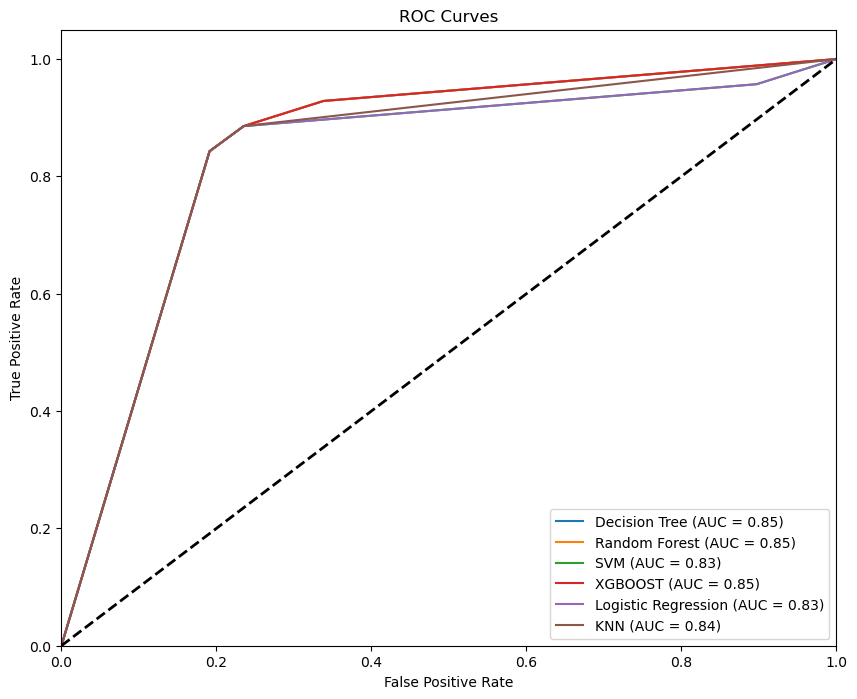

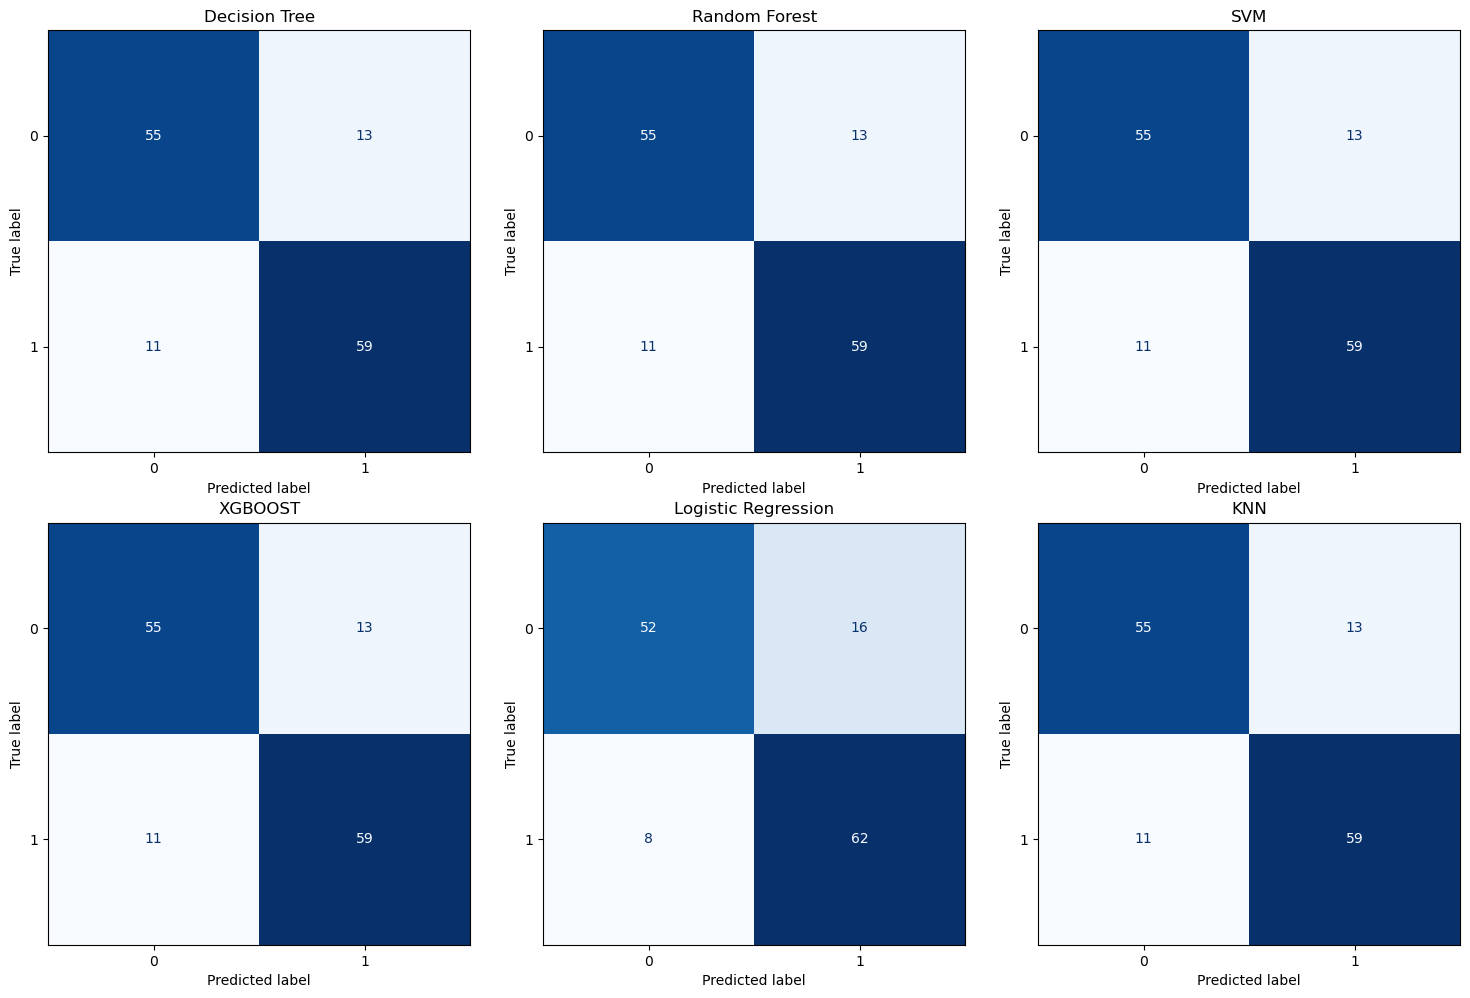

In [70]:
df_score = train_and_evaluate_models(
    X_train_lr_features, X_test_lr_featuresltered, y_train, y_test, df_score,
    'feature importance lr'
)

Decision Tree: Mean Accuracy = 0.862, Std = 0.033
Random Forest: Mean Accuracy = 0.862, Std = 0.033
SVM: Mean Accuracy = 0.862, Std = 0.033
XGBOOST: Mean Accuracy = 0.862, Std = 0.033
Logistic Regression: Mean Accuracy = 0.862, Std = 0.032
KNN: Mean Accuracy = 0.571, Std = 0.006
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.873874       0.873874  0.873874  0.873874             0.873874   
1       0.810811       0.810811  0.810811  0.810811             0.810811   
2       0.872727       0.872727  0.872727  0.872727             0.863636   
3       0.909091       0.909091  0.909091  0.909091             0.909091   
4       0.845455       0.845455  0.845455  0.845455             0.854545   

        KNN  
0  0.567568  
1  0.567568  
2  0.581818  
3  0.572727  
4  0.563636  
Decision Tree Test Accuracy: 0.826
Random Forest Test Accuracy: 0.826
SVM Test Accuracy: 0.833
XGBOOST Test Accuracy: 0.826
Logistic Regression Test Accuracy: 0.826
KNN Test Accur

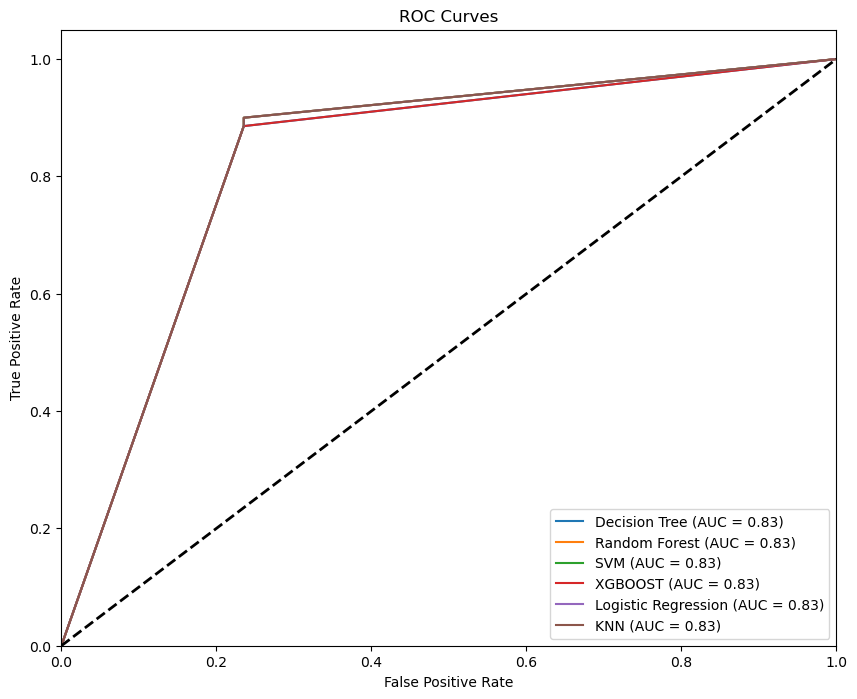

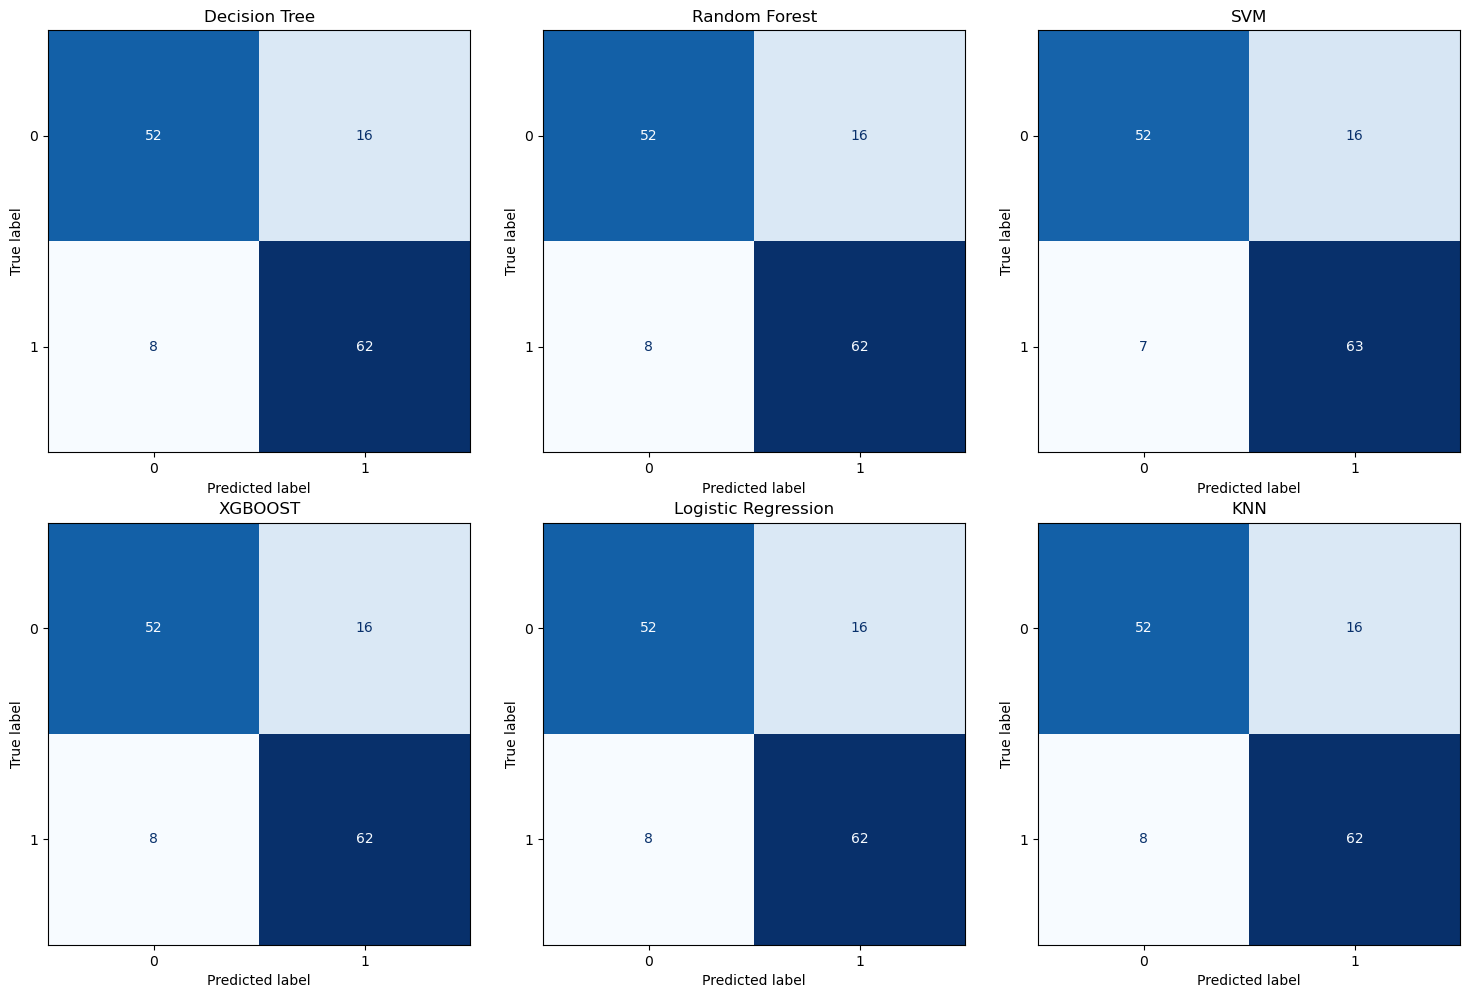

In [71]:
lr_features = ['A9_f', 'A13_p', 'A4_l']

X_train_lr_features_lasso = X_train_encoded[lr_features]
X_test_lr_features_lasso = X_test_encoded[lr_features]

df_score = train_and_evaluate_models(
    X_train_lr_features_lasso, X_test_lr_features_lasso, y_train, y_test, df_score,
    'lr lasso'
)

In [73]:
lr_features = ['A9_f', 'A13_g', 'A13_s', 'A13_p', 'A9_t']

X_train_lr_features = X_train_encoded[lr_features]
X_test_lr_featuresltered = X_test_encoded[lr_features]

XGBOOST: Mean Accuracy = 0.860, Std = 0.013
Logistic Regression: Mean Accuracy = 0.869, Std = 0.017
Lasso: Mean Accuracy = nan, Std = nan
    XGBOOST  Logistic Regression  Lasso
0  0.859813             0.887850    NaN
1  0.850467             0.859813    NaN
2  0.869159             0.878505    NaN
3  0.841121             0.841121    NaN
4  0.878505             0.878505    NaN
XGBOOST Test Accuracy: 0.881
Logistic Regression Test Accuracy: 0.843
Lasso Test Mean Squared Error: 0.116


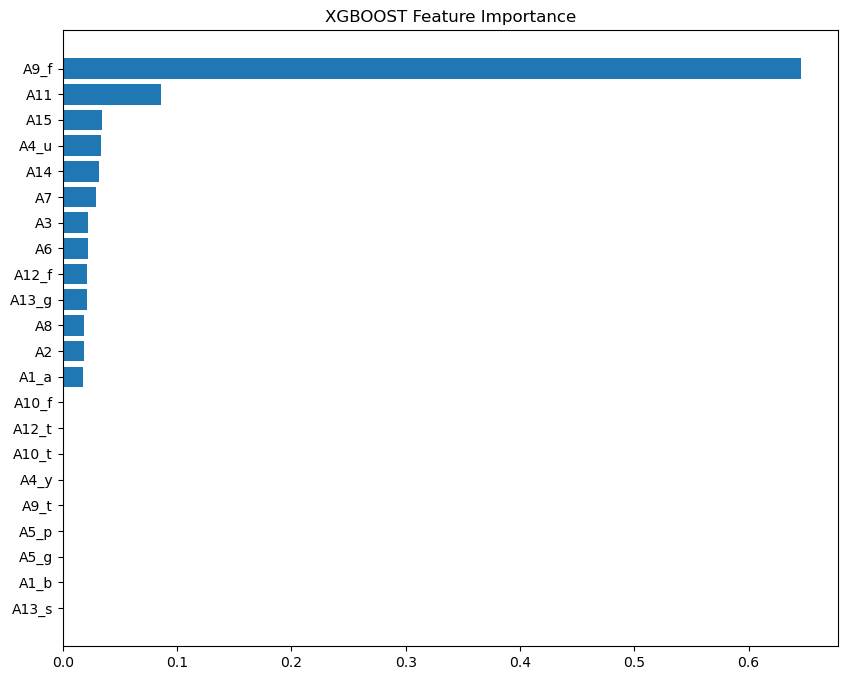

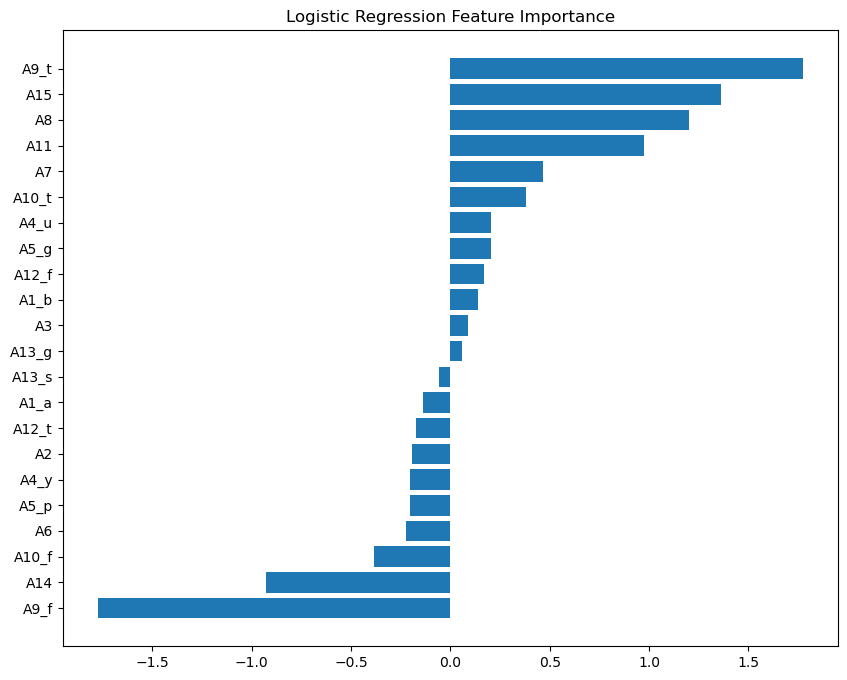

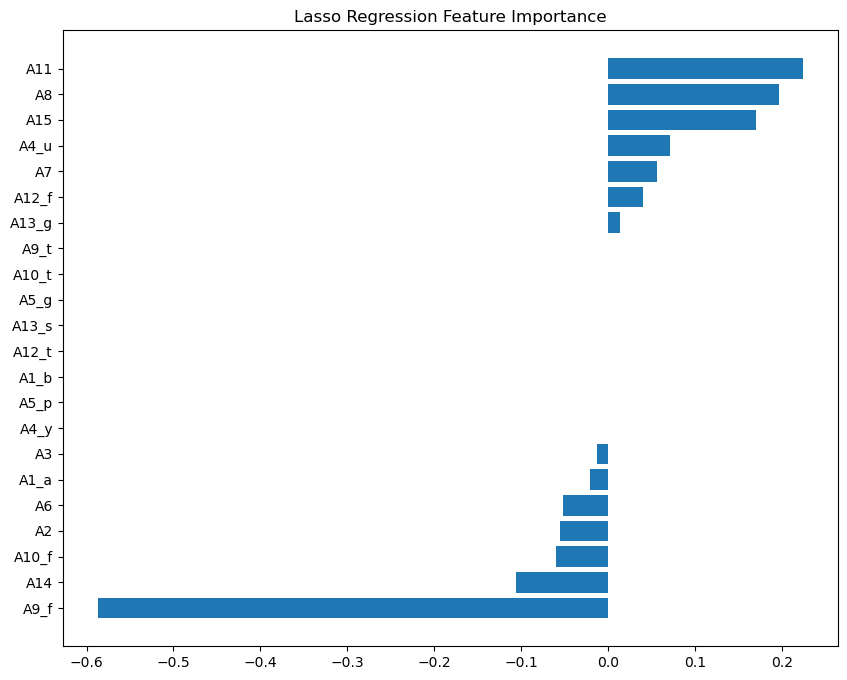

In [74]:
df_score, df_lasso = feature_importance(
    X_train_encoded_no_discretization_drop_minmax, X_test_encoded_no_discretization_drop_minmax, y_train_drop, y_test_drop, df_score,
    'feature importance test xgboost', X_train_encoded_no_discretization_drop_minmax.columns
)

Decision Tree: Mean Accuracy = 0.807, Std = 0.021
Random Forest: Mean Accuracy = 0.836, Std = 0.020
SVM: Mean Accuracy = 0.854, Std = 0.024
XGBOOST: Mean Accuracy = 0.834, Std = 0.022
Logistic Regression: Mean Accuracy = 0.860, Std = 0.033
KNN: Mean Accuracy = 0.839, Std = 0.023
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.794393       0.850467  0.878505  0.822430             0.878505   
1       0.785047       0.803738  0.841121  0.813084             0.831776   
2       0.822430       0.859813  0.869159  0.859813             0.906542   
3       0.794393       0.822430  0.813084  0.813084             0.813084   
4       0.841121       0.841121  0.869159  0.859813             0.869159   

        KNN  
0  0.859813  
1  0.813084  
2  0.841121  
3  0.813084  
4  0.869159  
Decision Tree Test Accuracy: 0.716
Random Forest Test Accuracy: 0.806
SVM Test Accuracy: 0.836
XGBOOST Test Accuracy: 0.821
Logistic Regression Test Accuracy: 0.821
KNN Test Accur

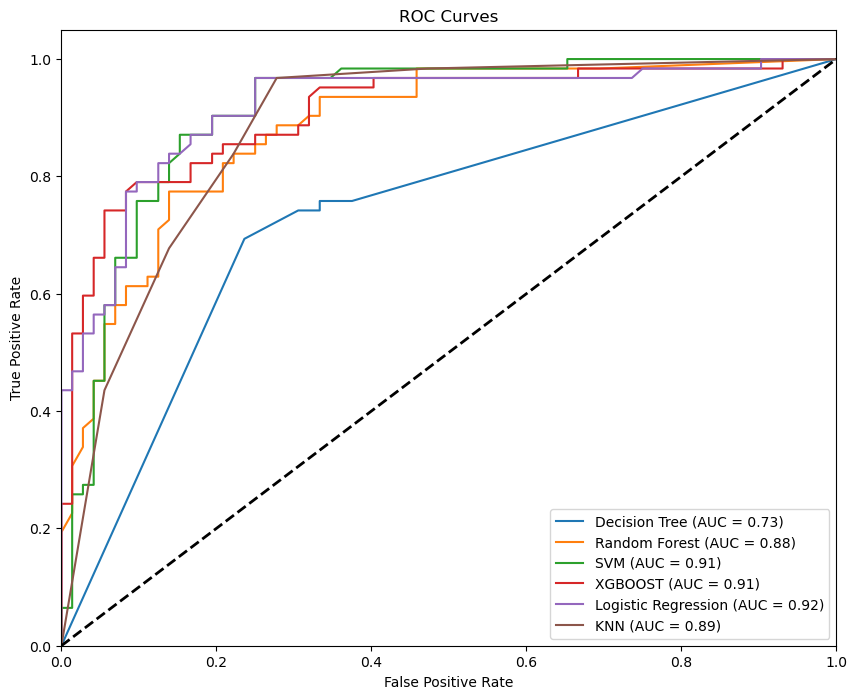

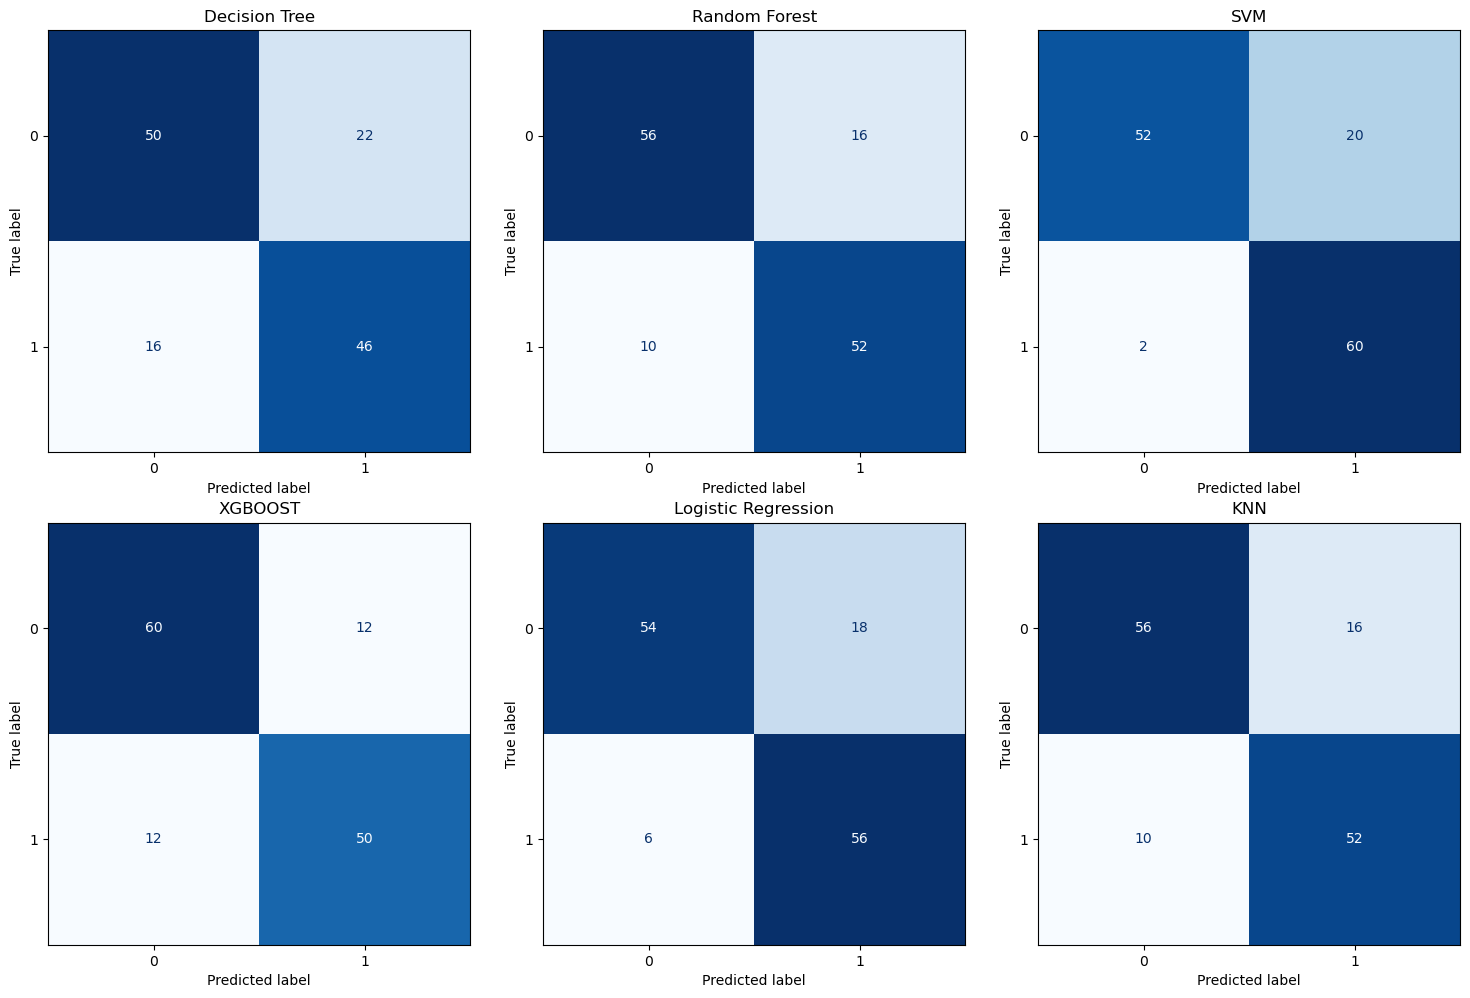

In [75]:
xgboost_lasso = ['A9_f', 'A8', 'A11', 'A15']

X_train_lr_features = X_train_encoded_no_discretization_drop_minmax[xgboost_lasso]
X_test_lr_featuresltered = X_test_encoded_no_discretization_drop_minmax[xgboost_lasso]

df_score = train_and_evaluate_models(
    X_train_lr_features, X_test_lr_featuresltered, y_train_drop, y_test_drop, df_score,
    'xgboost lasso'
)

In [76]:
df_score

,Dataset,Decision Tree,Random Forest,SVM,XGBOOST,Logistic Regression,KNN,Lasso
0,"Discretization, Standard Scaler",0.811594,0.840580,0.833333,0.826087,0.869565,0.818841,NaN
1,"No Discretization, Standard Scaler",0.789855,0.862319,0.840580,0.811594,0.869565,0.840580,NaN
2,"No Discretization, Drop, Standard Scaler",0.858209,0.850746,0.835821,0.880597,0.835821,0.798507,NaN
3,"Discretization, Drop, Standard Scaler",0.843284,0.835821,0.828358,0.865672,0.835821,0.805970,NaN
4,"Discretization, Minmax Scaler",0.811594,0.840580,0.840580,0.826087,0.840580,0.840580,NaN
5,"No Discretization, Drop, Minmax Scaler",0.858209,0.850746,0.850746,0.880597,0.843284,0.843284,NaN
6,"Discretization, Drop, Minmax Scaler",0.843284,0.835821,0.858209,0.865672,0.843284,0.828358,NaN
7,"No Discretization, Minmax Scaler",0.789855,0.862319,0.847826,0.811594,0.847826,0.869565,NaN
8,"No Discretization, Drop, PCA",0.783582,0.835821,0.850746,0.813433,0.865672,0.843284,NaN
9,"Discretization, Standard Scaler, PCA",0.695652,0.789855,0.804348,0.775362,0.797101,0.797101,NaN
